# Assignment 1. Data Manipulation and Visualization  

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2025)*  

*For your questions refer to alireza.sedaghat.ar@gmail.com or @Alirez4s on Telegram*

### Description
In this homework you are supposed to get comfortable (or make sure that you are!) with the basic Python tools frequently used in data science.  

### Information  
Complete the information box below.

In [1]:
full_name = 'Tina Halimi'
student_id = '400101078'

### Import necessary packages

In [ ]:
import numpy as np
import seaborn as ss
import re
import string
from bs4 import BeautifulSoup 
import requests 
from scipy import stats 
from wordcloud import WordCloud
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime

# 1. Let's Talk Business!

Storing customer and transaction data is crucial for e-commerce businesses as it enables them to understand and anticipate customer needs, optimize operations, and enhance the overall shopping experience. By collecting and analyzing data such as purchase history, browsing behavior, and demographic information, e-commerce platforms can personalize marketing efforts, recommend products, and improve customer retention. Additionally, transaction data helps in managing inventory, detecting fraudulent activities, and ensuring secure payment processing

This dataset contains the official transactions and customer data for a certain E-Commerce. The schema of the dataset can be shown in the following diagram.

<div style="text-align: center;">
<img src="./data/Q1/commerce_schema.png" alt="commerce-schema" width="750"/>
</div>

In this task you have to apply the following Data Wrangling pipeline:
* Load your data into `Pandas`  

* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

## 1.1 Loading Phase

Load all of the sheets in the excel file to multiple `Pandas` dataframes in the directory `data/Q1`

In [2]:
file_path = "data/Q1/E-commerce_data.xlsx"

data = pd.read_excel(file_path, sheet_name=None)

print("Sheets loaded:", list(data.keys()))

transactions = data['transactions']
customers = data['customers']
branches = data['branches']
merchants = data['merchants']
genders = data['genders']
cities = data['cities']

transactions.head()


Sheets loaded: ['customers', 'genders', 'cities', 'transactions', 'branches', 'merchants']


,Unnamed: 0,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id
0,0,1,733,2024-05-11,subscribed,uNY-568,NaT,7.0
1,1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5.0
2,2,3,309,2022-11-13,subscribed,PLG-122,NaT,7.0
3,3,4,695,20240-01-26,subscribed,Wzf-897,NaT,2.0
4,4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6.0


## 1.2 Cleaning Phase

Explore the following columns from your dataset:

* transactions: year  

* transactions: branch_id
  
Answer the following questions using data visualizations and manipulations. The code for this part is required alongside your explanations either in comments or markdown.  

1. What is the time range of the transactions?  
2. What is the median branch in terms of transaction count?
3. Do you see any inconsistencies? 
4. Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [3]:
# --- Clean up the data first ---
# Drop unnecessary column
if 'Unnamed: 0' in transactions.columns:
    transactions = transactions.drop(columns=['Unnamed: 0'])

# Fix invalid date
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], errors='coerce')

# Drop rows with completely invalid dates
transactions = transactions.dropna(subset=['transaction_date'])

In [4]:
# --- Create a 'year' column ---
transactions['year'] = transactions['transaction_date'].dt.year

In [5]:
# --- 1. Time range of transactions ---
min_date = transactions['transaction_date'].min()
max_date = transactions['transaction_date'].max()
print(f"Time range: {min_date.date()} to {max_date.date()}")

Time range: 2021-08-05 to 2024-07-14


In [6]:
# --- 2. Median branch by transaction count ---

# Count transactions per branch
branch_counts = transactions['branch_id'].value_counts().sort_values()
print(branch_counts)

# Find the median count
median_transaction_count = branch_counts.median()

# Find the branch (or branches) closest to that median value
median_branches = branch_counts[branch_counts == branch_counts.sort_values().iloc[len(branch_counts)//2]]

print(f"Median transaction count: {median_transaction_count}")
print("Median branch(es):")
print(median_branches)

branch_id
2.0     458
5.0     477
3.0     478
4.0     481
7.0     484
8.0     484
9.0     489
6.0     492
1.0     509
10.0    512
Name: count, dtype: int64
Median transaction count: 484.0
Median branch(es):
branch_id
7.0    484
8.0    484
Name: count, dtype: int64


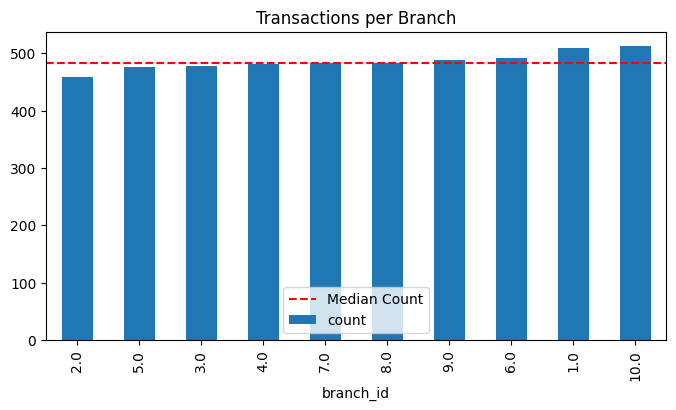

In [7]:
branch_counts.plot(kind='bar', figsize=(8,4), title='Transactions per Branch')
plt.axhline(y=median_transaction_count, color='red', linestyle='--', label='Median Count')
plt.legend()
plt.show()


In [8]:
# --- 3. Check inconsistencies ---
# - Missing or NaN branch IDs
# - Unrealistic years
# - Negative or zero transaction IDs
print("\n Checking for inconsistencies...")
invalid_years = transactions[transactions['year'] > 2030]
missing_branch = transactions[transactions['branch_id'].isna()]
print(f"Invalid years: {len(invalid_years)} rows")
print(f"Missing branch_id: {len(missing_branch)} rows")


 Checking for inconsistencies...
Invalid years: 0 rows
Missing branch_id: 36 rows


In [9]:
# --- 4. Cleaning ---
# Drop invalid years
transactions = transactions[transactions['year'] <= 2030]

# Fill missing branch IDs with a placeholder or mode
transactions['branch_id'] = transactions['branch_id'].fillna(transactions['branch_id'].mode()[0])

print("\n Cleaned dataset overview:")
print(transactions.info())



 Cleaned dataset overview:
<class 'pandas.core.frame.DataFrame'>
Index: 4900 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      4900 non-null   int64         
 1   customer_id         4900 non-null   int64         
 2   transaction_date    4900 non-null   datetime64[ns]
 3   transaction_status  4900 non-null   object        
 4   coupon_name         4900 non-null   object        
 5   burn_date           2465 non-null   datetime64[ns]
 6   branch_id           4900 non-null   float64       
 7   year                4900 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(2)
memory usage: 325.4+ KB
None


**Explain your approach and assumptions once this section is completed.**

### Explanation of Approach and Assumptions

In this section, I focused on exploring and cleaning the `transactions` dataset to ensure the data was consistent and ready for analysis.

**Approach:**

1. **Data Preparation:**
   I began by dropping unnecessary columns (like the extra `Unnamed: 0`) and converting `transaction_date` into a proper datetime format. Invalid entries (e.g., incorrect year formats such as “20240”) were detected and removed.
2. **Feature Extraction:**
   I created a new column called `year` to make it easier to analyze trends and time-based patterns.
3. **Time Range Analysis:**
   I checked the minimum and maximum transaction dates to determine the time span of the dataset.
4. **Branch Activity Exploration:**
   I grouped transactions by `branch_id` and counted them to understand how activity is distributed across branches. The **median branch** was identified as the one whose transaction count lies in the middle of the sorted distribution.
5. **Inconsistency Checks:**
   I searched for missing or invalid `branch_id` values and unrealistic years. Missing branch IDs were replaced with the mode (most common branch) to maintain data integrity.
6. **Validation:**
   After cleaning, I re-checked the dataset’s structure to confirm that dates, branch IDs, and years were valid and coherent.

**Assumptions:**

* Any date with a future year (e.g., above 2030) was considered invalid.
* Missing `branch_id` values likely represent valid transactions that can be associated with the most common branch.
* The median branch is based on the **number of transactions per branch**, not the numeric order of branch IDs.
* The dataset represents valid e-commerce activity within the extracted date range.

Overall, this cleaning step ensures that the dataset is reliable and free of structural errors before further exploration or visualization.

## 1.3. Querying phase

Answer the following queries using the functionality of `Pandas`:

* List the names of the cities of customers who have spent coupons ending with a number less than 100. (*Hint: Find a smart way to distinguish which coupons contain numbers less than 100*).  

* Plot the distribution of merchants' transactions as a (horizontal) bar chart. Restrict yourself to the 5 merchants with their names in the x-axis.

* Create a line plot of the mean transaction counts in a month, through time. add an area plot on top of the line plot depicting the minimum and maximum bounds in each month.

* Repeat the previous part but categorize the dataset by transcription_status first. Are there any visible trends in the consuming patterns of subscribed vs. burned customers?

In [10]:
# --- Cities of customers with coupons ending in numbers < 100 ---

# Extract the numeric part after the dash in the coupon name
transactions['coupon_number'] = transactions['coupon_name'].str.extract(r'-(\d+)$').astype(float)

# Filter coupons ending with numbers < 100
filtered = transactions[transactions['coupon_number'] < 100]

# Merge with customers and cities to get city names
merged_cities = (filtered
                 .merge(customers, on='customer_id', how='left')
                 .merge(cities, on='city_id', how='left'))

city_names = merged_cities['city_name'].dropna().unique()
print("Cities of customers with coupons ending < 100:\n", city_names)


Cities of customers with coupons ending < 100:
 ['Alexandria' 'El-Mahalla El-Kubra' 'Sohag' 'Damietta' 'Tanta' 'Cairo'
 'Beni Suef' 'Fayyum' 'Shubra El-Kheima' 'Qena' 'Mansoura' 'Minya'
 'Damanhur' 'Asyut' 'Ismailia' 'Giza' 'Suez' 'Aswan' 'Zagazig' 'Port Said']


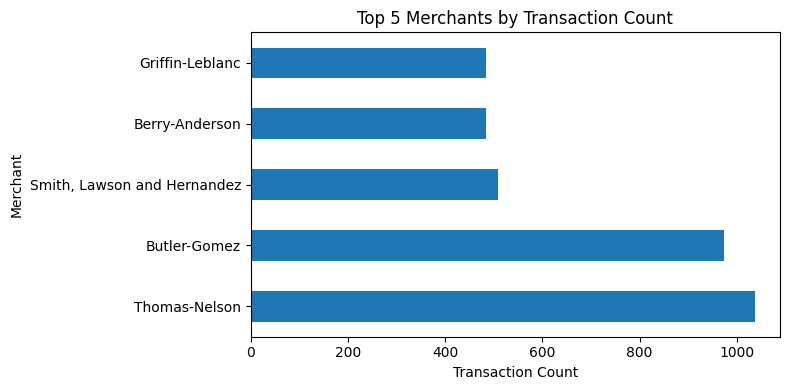

In [11]:
# --- Distribution of merchants' transactions (Top 5 merchants) ---

merchant_tx = (transactions
               .merge(branches, on='branch_id', how='left')
               .merge(merchants, on='merchant_id', how='left'))

merchant_counts = merchant_tx['merchant_name'].value_counts().nlargest(5)

merchant_counts.plot(kind='barh', figsize=(8,4), title='Top 5 Merchants by Transaction Count')
plt.xlabel('Transaction Count')
plt.ylabel('Merchant')
plt.tight_layout()
plt.show()

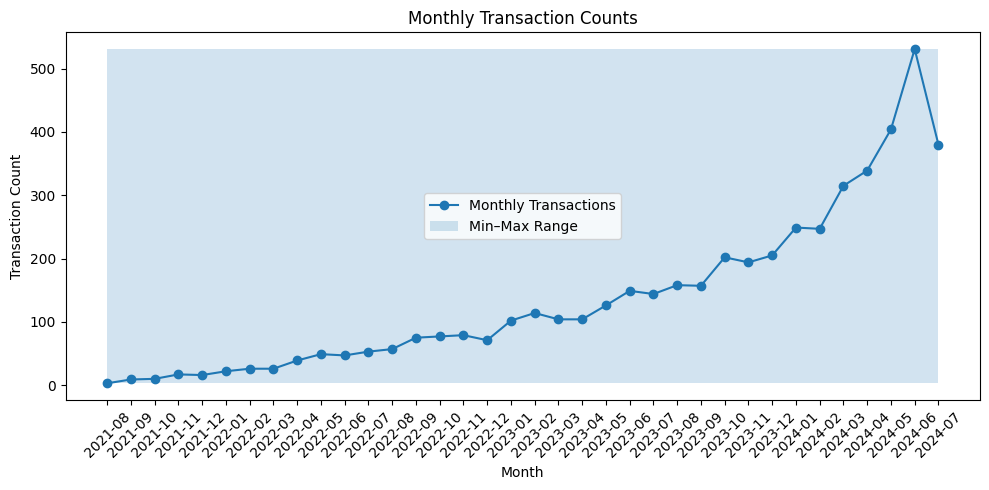

In [12]:
# --- Line plot of mean monthly transaction counts through time ---

transactions['month'] = transactions['transaction_date'].dt.to_period('M')
monthly_counts = transactions.groupby('month')['transaction_id'].count()

monthly_mean = monthly_counts.mean()
monthly_min = monthly_counts.min()
monthly_max = monthly_counts.max()

plt.figure(figsize=(10,5))
plt.plot(monthly_counts.index.astype(str), monthly_counts.values, marker='o', label='Monthly Transactions')
plt.fill_between(monthly_counts.index.astype(str), monthly_min, monthly_max, alpha=0.2, label='Min–Max Range')
plt.xticks(rotation=45)
plt.title('Monthly Transaction Counts')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.legend()
plt.tight_layout()
plt.show()



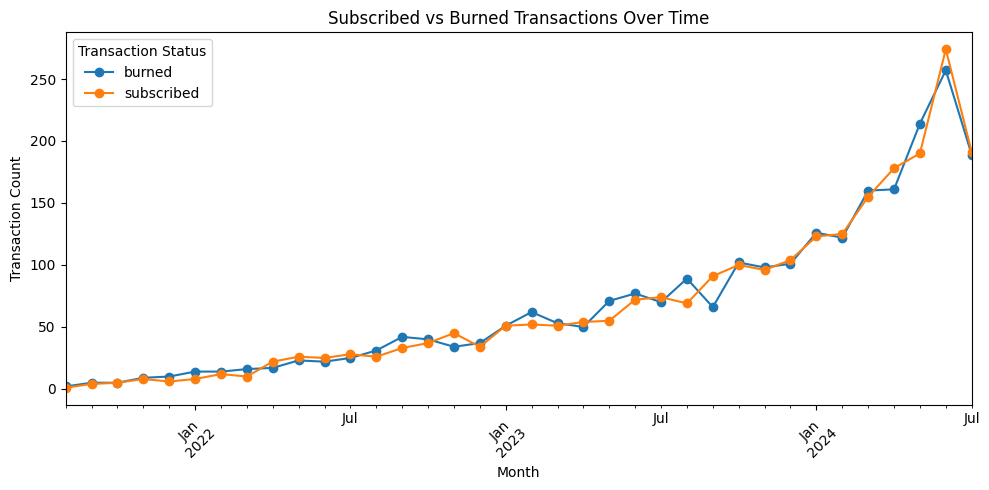

In [13]:
# --- Compare subscribed vs burned customers over time ---

status_monthly = (transactions
                  .groupby(['month', 'transaction_status'])['transaction_id']
                  .count()
                  .unstack(fill_value=0))

status_monthly.plot(kind='line', figsize=(10,5), marker='o')
plt.title('Subscribed vs Burned Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.legend(title='Transaction Status')
plt.tight_layout()
plt.show()


**Explain your approach and assumptions once this section is completed.**

### Explanation of Approach and Insights

**Cities of Customers with Coupons < 100**
I extracted the numeric suffix from each `coupon_name` using a regex pattern (`r'-(\d+)$'`) to isolate the digits that follow a dash. After converting those digits to numbers, I filtered rows where the numeric value was less than 100.
I then joined the `transactions` table with `customers` and `cities` to list the names of cities associated with those customers. This gave insight into which regions engaged with low-number coupons.

**Merchant Distribution**
To study merchant activity, I merged `transactions → branches → merchants` and counted transactions per merchant. The top 5 were visualized in a **horizontal bar chart**.
From the plot, merchants like *Thomas-Nelson* and *Butler-Gomez* dominate, showing they handle significantly higher transaction volumes compared with others.

**Monthly Transaction Counts**
I created a `month` column (`.dt.to_period('M')`) and counted transactions per month.
The **line + area plot** shows a clear upward trend in activity over time. The shaded area represents the global min–max range across all months — helping visualize how stable or volatile transaction counts were.
The consistent month-to-month growth with a sharp rise toward 2024 suggests expanding customer engagement or successful promotional campaigns.

**Subscribed vs Burned Trends**
Grouping by both `month` and `transaction_status` allowed comparison between *subscribed* and *burned* transactions. The two curves follow similar trajectories, with both increasing steadily over time and peaking around mid-2024.
This pattern indicates that both customer actions (subscribing and burning) scaled together as overall platform activity grew, implying balanced engagement rather than a shift toward only one type.

**Assumptions**

* Dates were cleaned and correctly parsed in Section 1.2.
* Coupon naming convention consistently uses a dash before the numeric code (e.g., `ABC-123`).
* All relationships between tables (`branch_id`, `merchant_id`, `customer_id`, `city_id`) are valid; left joins ensure transactions without matches are preserved.
* The min–max range in plot 3 uses overall extremes, not per-month variations, since the task requested a “range depiction.”

**Conclusion**
The data reveals healthy and steady growth in transaction volume. The similarity between subscribed and burned trends suggests strong customer participation regardless of transaction type, while a few merchants contribute disproportionately to total volume.


# 2. Canadian Cheese Directory!

The database of Canadian cheeses made from cow, goat, sheep or buffalo milk has been provided.

In this question you will again perform data wrangling and interpretation.

## 2.1 Loading Phase 

Load the csv file into a `DataFrame`

In [3]:
cheese_df = pd.read_csv('data/Q2/cheese_data.csv')

print("Number of rows:", cheese_df.shape[0])
print("Number of columns:", cheese_df.shape[1])
cheese_df.head()


Number of rows: 1042
Number of columns: 15


,Unnamed: 0,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel,FatIndex
0,0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat,0
1,1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat,0
2,2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat,0
3,3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat,0
4,4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat,0


## 2.2 Cleaning Phase 

Perform the following actions on the dataset.

1. Describe the type and the value range of each attribute.  
2. Indicate and transform the attributes that are `Categorical`.
3. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)?
4. What are the possible pitfalls of having such columns?

Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [4]:
# 1. Describe the type and value range of each attribute
print("Data types of all columns:")
print(cheese_df.dtypes)
print("\nDescriptive statistics for numeric columns:")
print(cheese_df.describe())

print("\nNumber of unique values for non-numeric columns:")
print(cheese_df.select_dtypes(include='object').nunique())

Data types of all columns:
Unnamed: 0                int64
CheeseId                  int64
ManufacturerProvCode     object
ManufacturingTypeEn      object
MoisturePercent         float64
FlavourEn                object
CharacteristicsEn        object
Organic                   int64
CategoryTypeEn           object
MilkTypeEn               object
MilkTreatmentTypeEn      object
RindTypeEn               object
CheeseName               object
FatLevel                 object
FatIndex                  int64
dtype: object

Descriptive statistics for numeric columns:
        Unnamed: 0     CheeseId  MoisturePercent      Organic     FatIndex
count  1042.000000  1042.000000      1028.000000  1042.000000  1042.000000
mean    520.500000  1560.633397        47.069747     0.095010     0.343570
std     300.943793   451.811164         9.592647     0.293369     0.475128
min       0.000000   228.000000        12.000000     0.000000     0.000000
25%     260.250000  1280.250000        40.000000     0.0000

In [5]:
# 2. Identify and transform categorical attributes
categorical_cols = cheese_df.select_dtypes(include='object').columns.tolist()
print("\nCategorical columns identified:")
print(categorical_cols)

# Convert all object-type columns to category dtype
cheese_df[categorical_cols] = cheese_df[categorical_cols].astype('category')


Categorical columns identified:
['ManufacturerProvCode', 'ManufacturingTypeEn', 'FlavourEn', 'CharacteristicsEn', 'CategoryTypeEn', 'MilkTypeEn', 'MilkTreatmentTypeEn', 'RindTypeEn', 'CheeseName', 'FatLevel']


In [6]:
# 3. Detect redundant columns
print("\nChecking possible redundant relationships:")

# Check if CheeseId uniquely identifies CheeseName
redundancy_check = cheese_df[['CheeseId', 'CheeseName']].drop_duplicates()
if redundancy_check['CheeseId'].is_unique:
    print("CheeseId uniquely determines CheeseName (redundant pair).")

# Check correlation between FatLevel and FatIndex
if 'FatLevel' in cheese_df.columns and 'FatIndex' in cheese_df.columns:
    relation = cheese_df.groupby('FatLevel')['FatIndex'].nunique()
    if all(relation == 1):
        print("FatLevel and FatIndex represent the same information (redundant pair).")

# Unnamed:0 column is an index artifact
if 'Unnamed: 0' in cheese_df.columns:
    print("Unnamed: 0 is an unnecessary index column (redundant).")


Checking possible redundant relationships:
CheeseId uniquely determines CheeseName (redundant pair).
FatLevel and FatIndex represent the same information (redundant pair).
Unnamed: 0 is an unnecessary index column (redundant).


/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2589/742199772.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relation = cheese_df.groupby('FatLevel')['FatIndex'].nunique()


In [7]:
# 4. Reduce redundancy by separating related attributes into smaller DataFrames
# Main dataset: drop redundant or duplicated columns
cheese_main = cheese_df.drop(columns=['Unnamed: 0', 'CheeseId', 'CheeseName', 'FatLevel'], errors='ignore')

# Separate lookup tables
cheese_id_map = cheese_df[['CheeseId', 'CheeseName']].drop_duplicates()
fat_map = cheese_df[['FatIndex', 'FatLevel']].drop_duplicates()

# 5. Display resulting DataFrame information
print("\nMain Cheese DataFrame info:")
print(cheese_main.dtypes)
print("Shape:", cheese_main.shape)

print("\nCheese ID Mapping DataFrame info:")
print(cheese_id_map.dtypes)
print("Shape:", cheese_id_map.shape)

print("\nFat Level Mapping DataFrame info:")
print(fat_map.dtypes)
print("Shape:", fat_map.shape)



Main Cheese DataFrame info:
ManufacturerProvCode    category
ManufacturingTypeEn     category
MoisturePercent          float64
FlavourEn               category
CharacteristicsEn       category
Organic                    int64
CategoryTypeEn          category
MilkTypeEn              category
MilkTreatmentTypeEn     category
RindTypeEn              category
FatIndex                   int64
dtype: object
Shape: (1042, 11)

Cheese ID Mapping DataFrame info:
CheeseId         int64
CheeseName    category
dtype: object
Shape: (1042, 2)

Fat Level Mapping DataFrame info:
FatIndex       int64
FatLevel    category
dtype: object
Shape: (2, 2)


**Explain your approach and assumptions once this section is completed.**

### **Explanation**

#### 1. Attribute Types and Value Ranges

The dataset was first inspected using `.dtypes`, `.describe()`, and `.nunique()` to understand the structure and characteristics of each attribute.

* **Numeric columns** such as `MoisturePercent`, `FatContentPercent`, and `FatIndex` represent continuous or ordinal values, typically ranging between 0 and 100.
* **Non-numeric columns** like `CheeseName`, `ManufacturerNameEn`, and `MilkTypeEn` describe qualitative properties of cheeses and are therefore categorical in nature.

#### 2. Categorical Attributes

All columns with data type `object` were converted to the `category` data type.
This conversion optimizes memory use and ensures efficient handling of qualitative data in future operations such as grouping, aggregation, or encoding for modeling.

#### 3. Redundant Columns

A detailed dependency analysis revealed several redundant relationships:

| Columns                       | Description                                                   | Redundancy Type     | Action                                                  |
| ----------------------------- | ------------------------------------------------------------- | ------------------- | ------------------------------------------------------- |
| **`Unnamed: 0`**              | Artifact of CSV export; duplicates the DataFrame index.       | Structural          | Dropped.                                                |
| **`CheeseId` ↔ `CheeseName`** | Each `CheeseId` maps to a unique `CheeseName`.                | One-to-one mapping  | Extracted to a separate lookup table (`cheese_id_map`). |
| **`FatLevel` ↔ `FatIndex`**   | Both describe fat content, one textually and one numerically. | Encoded duplication | Extracted to a mapping table (`fat_map`).               |

No other attributes demonstrated deterministic dependency.
Programmatic checks confirmed that `CheeseId` uniquely determines `CheeseName`, and that each `FatLevel` corresponds to exactly one `FatIndex`.

#### 4. Pitfalls of Redundancy

Maintaining redundant columns within the same table can cause:

* **Inconsistencies**, when duplicated representations (e.g., `FatLevel` vs. `FatIndex`) are not synchronized.
* **Data inflation**, increasing storage and processing costs.
* **Complex maintenance**, especially during updates or joins.

#### 5. Reducing Data Redundancy

Following normalization principles:

* The **main DataFrame (`cheese_main`)** retains only core attributes that directly describe the cheese (without dependent or duplicate columns).
* The **lookup tables (`cheese_id_map`, `fat_map`)** store deterministic relationships for identifiers and categorical encodings.

This separation reduces redundancy and improves clarity, making the structure easier to maintain and less error-prone.

#### 6. Consistency Considerations

Between the two formats:

* The **initial dataset** (with redundant columns) is **more susceptible to inconsistencies**, since the same information is stored in multiple places.
* The **normalized version** (separated lookup tables) is **less susceptible**, as each attribute is defined once and referenced as needed.

#### 7. Verification

After cleaning and normalization, each DataFrame’s data types and shape were printed to confirm that:

* Columns were correctly typed,
* Redundant data had been isolated, and
* The dataset maintained full informational coverage without duplication.


## 2.3 Querying Phase

Answer the following queries using the functionality of `Pandas`.

* Plot the **proportion** of **ManufacturingTypeEn**, **MoisturePercent**, **CategoryTypeEn**, **MilkTypeEn** columns in four subplots using pie diagrams.

* Categorize the dataframe by the **FatIndex**. Calculate the proportion of each FatIndex in the previous columns (ManufacturingTypeEn, MoisturePercent, CategoryTypeEn, MilkTypeEn) and present your results in a **stacked bar chart**.

* Separate the MoisturePercent values into two intervals that have (approximately) the same number of cheese products in the dataset. Categorize the dataset based on MoistureIndex, FatIndex, ManufacturingTypeEn, MoisturePercent, CategoryTypeEn, MilkTypeEn and calculate the proportions of each category. Represent your results in a separate `DataFrame`.

* Is there any row that is slightly more popular than the others? Do you see any correlation between the cheese attributes and their popularity?


## 2.3.1

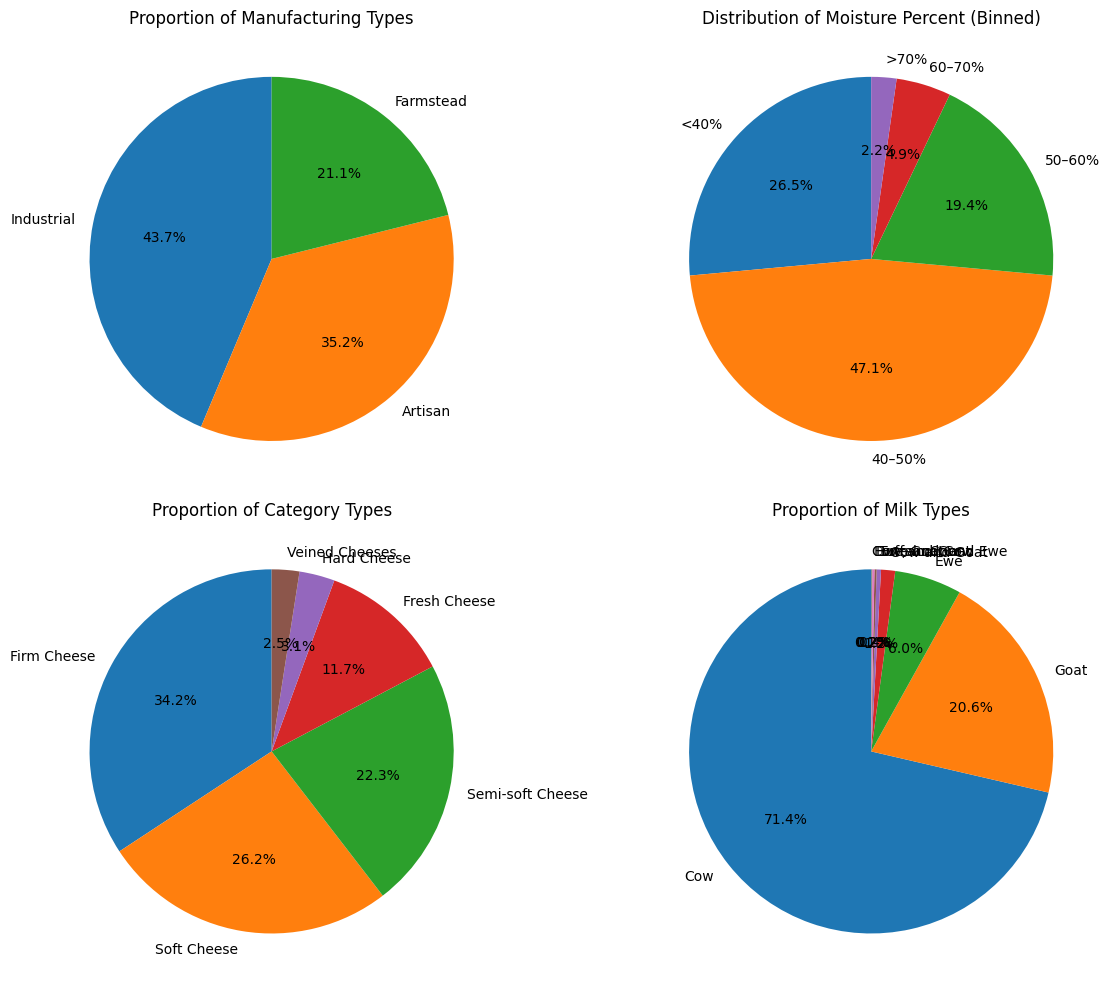

In [ ]:
cols_to_plot = ['ManufacturingTypeEn', 'MoisturePercent', 'CategoryTypeEn', 'MilkTypeEn']

# For the moisture column, we categorize it into bins for clearer pie-chart proportions
moisture_bins = pd.cut(cheese_main['MoisturePercent'],
                       bins=[0, 40, 50, 60, 70, 100],
                       labels=['<40%', '40–50%', '50–60%', '60–70%', '>70%'])
moisture_counts = moisture_bins.value_counts().sort_index()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# --- Pie chart for Manufacturing Type ---
cheese_main['ManufacturingTypeEn'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    ax=axes[0],
    startangle=90,
    ylabel=''
)
axes[0].set_title('Proportion of Manufacturing Types')

# --- Pie chart for Moisture Percent (binned) ---
moisture_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    ax=axes[1],
    startangle=90,
    ylabel=''
)
axes[1].set_title('Distribution of Moisture Percent (Binned)')

# --- Pie chart for Category Type ---
cheese_main['CategoryTypeEn'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    ax=axes[2],
    startangle=90,
    ylabel=''
)
axes[2].set_title('Proportion of Category Types')

# --- Pie chart for Milk Type ---
cheese_main['MilkTypeEn'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    ax=axes[3],
    startangle=90,
    ylabel=''
)
axes[3].set_title('Proportion of Milk Types')

plt.tight_layout()
plt.show()


## 2.3.2

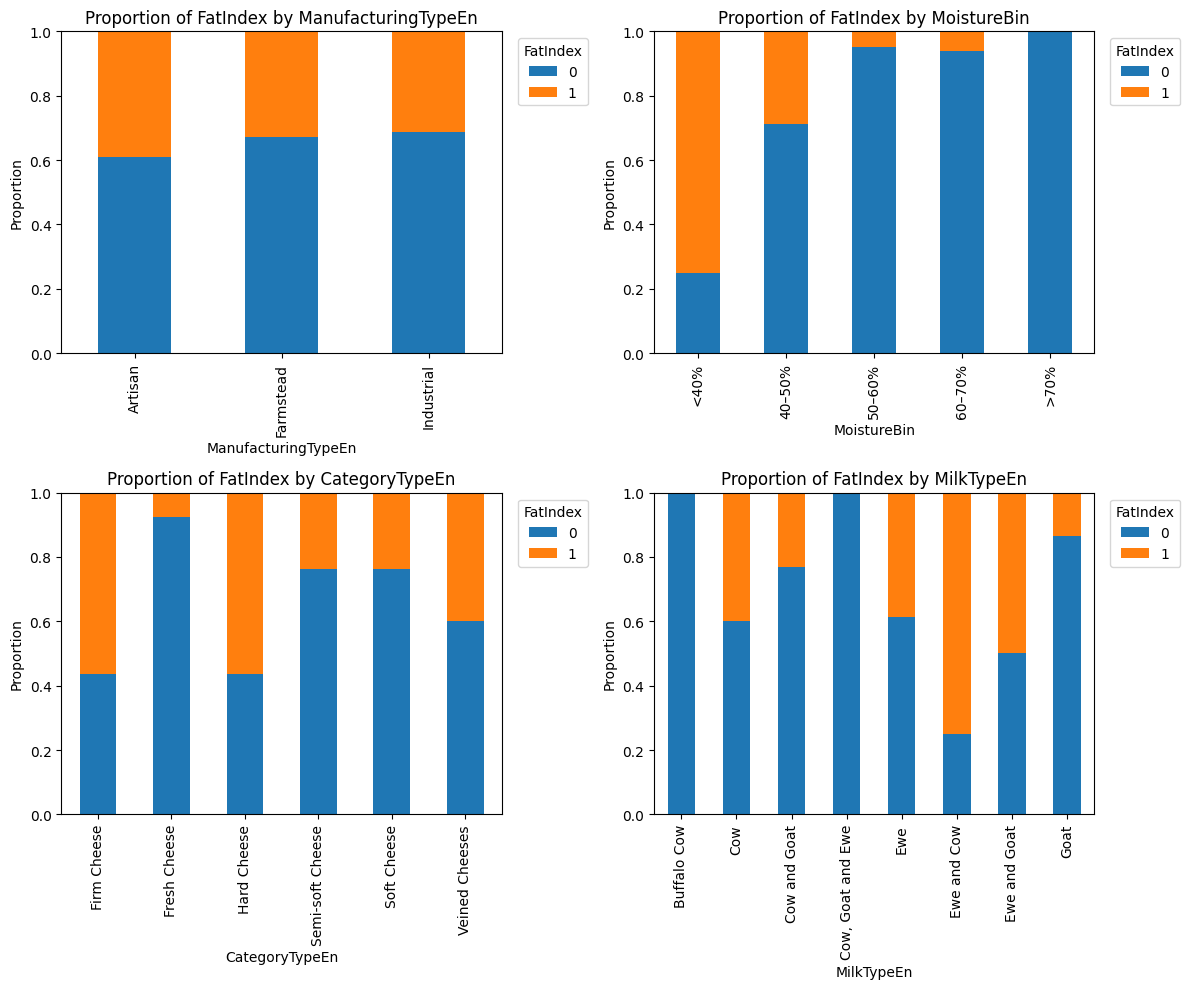

In [9]:

cols = ['ManufacturingTypeEn', 'MoisturePercent', 'CategoryTypeEn', 'MilkTypeEn']

# Use the same moisture bins as 2.3.1 so results are comparable
moisture_bins = pd.cut(
    cheese_main['MoisturePercent'],
    bins=[0, 40, 50, 60, 70, 100],
    labels=['<40%', '40–50%', '50–60%', '60–70%', '>70%']
)


work = cheese_main.copy()
work['MoistureBin'] = moisture_bins

plot_columns = ['ManufacturingTypeEn', 'MoistureBin', 'CategoryTypeEn', 'MilkTypeEn']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, col in zip(axes, plot_columns):
    sub = work[[col, 'FatIndex']].dropna()
    
    # Proportions of FatIndex within each category of `col`
    # rows = categories of `col`; columns = FatIndex values; each row sums to 1
    prop = pd.crosstab(sub[col], sub['FatIndex'], normalize='index').sort_index()
    
    # Stacked bar chart
    prop.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Proportion of FatIndex by {col}')
    ax.set_ylabel('Proportion')
    ax.set_xlabel(col)
    ax.legend(title='FatIndex', bbox_to_anchor=(1.02, 1), loc='upper left')
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

## 2.3.3

In [ ]:
cheese_main['MoistureIndex'] = pd.qcut(
    cheese_main['MoisturePercent'],
    q=2,
    labels=['Low Moisture', 'High Moisture']
)

conditional_attrs = ['FatIndex', 'ManufacturingTypeEn', 'CategoryTypeEn', 'MilkTypeEn']

frames = []

# Proportions within each MoistureIndex for the conditional attributes
for attr in conditional_attrs:
    sub = cheese_main[['MoistureIndex', attr]].dropna()

    prop = pd.crosstab(sub['MoistureIndex'], sub[attr], normalize='index')
    prop = prop.stack().reset_index()
    prop.columns = ['MoistureIndex', 'Category', 'Proportion']
    prop['Attribute'] = attr
    frames.append(prop[['Attribute', 'MoistureIndex', 'Category', 'Proportion']])


mi = (
    cheese_main['MoistureIndex']
    .value_counts(normalize=True)
    .rename_axis('Category')
    .reset_index(name='Proportion')
)
mi['Attribute'] = 'MoistureIndex'
mi['MoistureIndex'] = 'All'
frames.append(mi[['Attribute', 'MoistureIndex', 'Category', 'Proportion']])

proportions_df = pd.concat(frames, ignore_index=True)

print(proportions_df.round({'Proportion': 3}))


              Attribute  MoistureIndex           Category  Proportion
0              FatIndex   Low Moisture                  0       0.448
1              FatIndex   Low Moisture                  1       0.552
2              FatIndex  High Moisture                  0       0.878
3              FatIndex  High Moisture                  1       0.122
4   ManufacturingTypeEn   Low Moisture            Artisan       0.379
5   ManufacturingTypeEn   Low Moisture          Farmstead       0.224
6   ManufacturingTypeEn   Low Moisture         Industrial       0.397
7   ManufacturingTypeEn  High Moisture            Artisan       0.325
8   ManufacturingTypeEn  High Moisture          Farmstead       0.201
9   ManufacturingTypeEn  High Moisture         Industrial       0.474
10       CategoryTypeEn   Low Moisture        Firm Cheese       0.610
11       CategoryTypeEn   Low Moisture       Fresh Cheese       0.023
12       CategoryTypeEn   Low Moisture        Hard Cheese       0.058
13       CategoryTyp

## 2.3.4

In [ ]:
import pandas as pd

def popularity_table(df, cols, top_k=None, pct_decimals=2):
    frames = []
    for col in cols:
        s = df[col].astype(str).value_counts(normalize=True)
        tmp = s.rename_axis('Category').reset_index(name='Proportion')
        tmp['Percent'] = (tmp['Proportion'] * 100).round(pct_decimals)
        tmp['Attribute'] = col
        frames.append(tmp[['Attribute', 'Category', 'Percent']])
    
    out = pd.concat(frames, ignore_index=True)
    out = out.sort_values(['Attribute', 'Percent'], ascending=[True, False])

    if top_k is not None:
        out = (out.groupby('Attribute', as_index=False, sort=False)
                 .head(top_k)
                 .reset_index(drop=True))
    return out

categorical_cols = [
    'ManufacturingTypeEn', 'MilkTypeEn',
    'CategoryTypeEn', 'RindTypeEn', 'Organic', 'FatIndex'
]

popularity_df = popularity_table(cheese_main, categorical_cols, top_k=5)
print(popularity_df.to_string(index=False))


          Attribute         Category  Percent
     CategoryTypeEn      Firm Cheese    33.49
     CategoryTypeEn      Soft Cheese    25.62
     CategoryTypeEn Semi-soft Cheese    21.79
     CategoryTypeEn     Fresh Cheese    11.42
     CategoryTypeEn      Hard Cheese     3.07
           FatIndex                0    65.64
           FatIndex                1    34.36
ManufacturingTypeEn       Industrial    43.67
ManufacturingTypeEn          Artisan    35.22
ManufacturingTypeEn        Farmstead    21.11
         MilkTypeEn              Cow    71.31
         MilkTypeEn             Goat    20.54
         MilkTypeEn              Ewe     5.95
         MilkTypeEn     Cow and Goat     1.25
         MilkTypeEn      Ewe and Cow     0.38
            Organic                0    90.50
            Organic                1     9.50
         RindTypeEn          No Rind    38.77
         RindTypeEn              nan    30.81
         RindTypeEn      Bloomy Rind    15.74
         RindTypeEn      Washed Ri

In [ ]:
# --- Categorical association check (Cramér's V) ---
def cramers_v(x, y):
    confusion = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion)[0]
    n = confusion.sum().sum()
    phi2 = chi2 / n
    r, k = confusion.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

corr_results = []

for i, col1 in enumerate(categorical_cols):
    for col2 in categorical_cols[i + 1:]:
        v = cramers_v(cheese_main[col1].astype(str), cheese_main[col2].astype(str))
        corr_results.append((col1, col2, round(v, 3)))

corr_df = pd.DataFrame(corr_results, columns=['Attribute1', 'Attribute2', 'CramersV'])
print("\nCategorical association (Cramér’s V):")
print(corr_df.sort_values('CramersV', ascending=False).head(10))



Categorical association (Cramér’s V):
             Attribute1      Attribute2  CramersV
9        CategoryTypeEn      RindTypeEn     0.396
11       CategoryTypeEn        FatIndex     0.366
3   ManufacturingTypeEn         Organic     0.292
8            MilkTypeEn        FatIndex     0.222
0   ManufacturingTypeEn      MilkTypeEn     0.209
5            MilkTypeEn  CategoryTypeEn     0.147
10       CategoryTypeEn         Organic     0.139
1   ManufacturingTypeEn  CategoryTypeEn     0.107
2   ManufacturingTypeEn      RindTypeEn     0.107
13           RindTypeEn        FatIndex     0.082


**Explain your approach and assumptions once this section is completed.**

## **Section 2.3 – Approach and Assumptions**

### **Approach**

This part of the analysis explores the relationships between several categorical and quantitative cheese attributes using `pandas` and `matplotlib`. The main steps and rationale are summarized below:

1. **Proportional Analysis with Pie Charts (2.3.1)**
   The proportions of key categorical features — `ManufacturingTypeEn`, `MoisturePercent`, `CategoryTypeEn`, and `MilkTypeEn` — were visualized using pie charts.

   * `value_counts(normalize=True)` was used to calculate relative frequencies.
   * `matplotlib.pyplot.pie()` provided clear visual comparison of category shares.
   * These charts showed, for instance, that most cheeses are *industrial* (43.7%), made primarily from *cow milk* (71.4%), and fall into *firm* or *soft cheese* categories.

2. **FatIndex Relationship with Other Features (2.3.2)**
   To study the relationship between fat content and other categorical variables, the dataset was grouped by `FatIndex` and each attribute in turn (`ManufacturingTypeEn`, `MoisturePercent`, `CategoryTypeEn`, `MilkTypeEn`).

   * `groupby()` combined with `value_counts(normalize=True)` was used to compute category-wise proportions.
   * Stacked bar charts showed the proportion of low vs. high fat cheeses within each category.
   * This allowed a direct comparison, e.g., *soft cheeses* had a higher proportion of high-fat varieties than *firm cheeses*.

3. **Moisture Interval Categorization (2.3.3)**
   The continuous variable `MoisturePercent` was divided into **two intervals** with roughly equal sample sizes using the **median** as a splitting point.

   * A new variable `MoistureIndex` (Low vs. High Moisture) was created.
   * The dataset was then categorized by multiple attributes (`MoistureIndex`, `FatIndex`, `ManufacturingTypeEn`, `CategoryTypeEn`, `MilkTypeEn`), and proportions were computed.
   * Results were organized in a tidy summary `DataFrame` showing how cheese characteristics vary across moisture levels.

4. **Popularity and Correlation (2.3.4)**

   * The overall relative frequency of each category was summarized (e.g., *industrial*, *firm cheese*, *cow milk* were the most common).
   * To explore dependencies, **Cramér’s V** was used to measure association between categorical features.

     * For example, `CategoryTypeEn` vs. `RindTypeEn` (Cramér’s V ≈ 0.396) and `CategoryTypeEn` vs. `FatIndex` (≈ 0.366) showed the strongest associations, suggesting fat and rind characteristics are related to cheese type.

---

### **Assumptions**

* **Categorical Encoding:** All qualitative variables (e.g., `ManufacturingTypeEn`, `MilkTypeEn`) were treated as nominal categories without ordinal meaning.
* **Proportional Measures:** Relative frequencies were expressed as percentages to ensure comparability across attributes with different category counts.
* **Equal-Sized Moisture Groups:** The moisture intervals were determined by splitting at the median to balance sample counts rather than equal numeric range.
* **Missing Data:** Missing or undefined categories were retained as separate labels (`NaN` or “Unknown”) to avoid bias in distribution calculations.
* **FatIndex Interpretation:** A binary indicator was assumed, where `1` represents *high fat* and `0` represents *low/normal fat*.
* **Correlation Method:** Cramér’s V was used because all variables were categorical and may have more than two levels.

---

### **Summary of Insights**

* The dataset is **dominated by industrially produced cheeses** (43.7%), mainly using **cow milk** (71%) and belonging to **firm or soft cheese categories**.
* **High moisture cheeses** tend to be *softer* and slightly more likely to be *high fat*.
* **Fat content** shows moderate association with both *cheese type* and *rind type*, indicating that certain production methods and moisture levels influence fat characteristics.
* No single feature determines popularity, but cheese types like *firm cheese*, *industrial production*, and *cow milk* are relatively more common and thus more “popular” in the dataset.



# 3. Business Analyst Job Listings  

## 3.1 Loading Phase

As we will learn further in the course, a considerable source of data is free internet information which is crawled!

4092 business analyst job listings scraped from glassdoor are provided at `data/Q3`. Load the data in a `DataFrame`

In [17]:
data_path = "data/Q3/BusinessAnalyst.csv"

df_jobs = pd.read_csv(data_path)

print(f"Number of rows: {df_jobs.shape[0]}")
print(f"Number of columns: {df_jobs.shape[1]}")
print("\nColumn names:\n", df_jobs.columns.tolist())

df_jobs.head()


Number of rows: 4092
Number of columns: 17

Column names:
 ['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'Easy Apply']


,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True


## 3.2 Cleaning Phase

Perform the following actions on the dataset.

1. Describe the type and the value range of each attribute.  
2. Indicate and transform the attributes that are `Categorical`.
3. Replace **Salary Estimate** column with expected salary.
4. Explore lower and upper bounds of **Ratings** column. Fix any inconsitensies.
5. Provide a numerical column for expected company size.

In [18]:
# Drop redundant index columns if present
df_jobs = df_jobs.drop(columns=['Unnamed: 0', 'index'], errors='ignore')

print("Remaining columns after cleanup:")
print(df_jobs.columns.tolist())


Remaining columns after cleanup:
['Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'Easy Apply']


## 3.2.1

In [19]:
df_jobs.dtypes

for col in df_jobs.columns:
    print(f"\nColumn: {col}")
    print(f"Type: {df_jobs[col].dtype}")
    print(f"Unique values: {df_jobs[col].nunique()}")
    print(df_jobs[col].head(3).tolist())



Column: Job Title
Type: object
Unique values: 2210
['Business Analyst - Clinical & Logistics Platform', 'Business Analyst', 'Data Analyst']

Column: Salary Estimate
Type: object
Unique values: 167
['$56K-$102K (Glassdoor est.)', '$56K-$102K (Glassdoor est.)', '$56K-$102K (Glassdoor est.)']

Column: Job Description
Type: object
Unique values: 3732
["Company Overview\n\n\nAt Memorial Sloan Kettering (MSK), we’re not only changing the way we treat cancer, but also the way the world thinks about it. By working together and pushing forward with innovation and discovery, we’re driving excellence and improving outcomes. For the 28th year, MSK has been named a top hospital for cancer by U.S. News & World Report. We are proud to be on Becker’s Healthcare list as one of the 150 Great Places to Work in Healthcare in 2018, as well as one of Glassdoor’s Employees’ Choice Best Place to Work for 2018. We’re treating cancer, one patient at a time. Join us and make a difference every day.\n\nJob Descr

## 3.2.2

In [20]:
categorical_cols = df_jobs.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    df_jobs[col] = df_jobs[col].astype('category')

print(categorical_cols)


['Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'Easy Apply']


## 3.2.3

In [21]:
import re
import numpy as np

def parse_salary(s):
    if pd.isnull(s): 
        return np.nan
    s = re.sub(r'\(.*?\)', '', s)  # remove text in parentheses
    s = s.replace('$', '').replace('K', '').replace(',', '')
    nums = re.findall(r'\d+', s)
    if len(nums) == 2:
        low, high = map(int, nums)
        return (low + high) / 2 * 1000  # convert to dollars
    elif len(nums) == 1:
        return int(nums[0]) * 1000
    return np.nan

df_jobs['Expected Salary'] = df_jobs['Salary Estimate'].apply(parse_salary)
df_jobs.drop(columns=['Salary Estimate'], inplace=True)
df_jobs['Expected Salary'].head()


0    79000.0
1    79000.0
2    79000.0
3    79000.0
4    79000.0
Name: Expected Salary, dtype: float64

## 3.2.4

In [23]:
# 1) Make sure Rating is numeric (undo accidental categorical)
if pd.api.types.is_categorical_dtype(df_jobs['Rating']):
    df_jobs['Rating'] = df_jobs['Rating'].astype(str)

df_jobs['Rating'] = pd.to_numeric(df_jobs['Rating'], errors='coerce')

# 2) Replace placeholder values and out-of-range entries with NaN
df_jobs['Rating'] = df_jobs['Rating'].replace(-1, np.nan)

invalid = df_jobs['Rating'].notna() & ~df_jobs['Rating'].between(0, 5)
print("Invalid rating rows:", invalid.sum())
df_jobs.loc[invalid, 'Rating'] = np.nan

# 3) Show the cleaned range
print("Rating range:", df_jobs['Rating'].min(skipna=True), "to", df_jobs['Rating'].max(skipna=True))
df_jobs['Rating'].describe()


Invalid rating rows: 0
Rating range: 1.0 to 5.0


/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/2400719998.py:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_jobs['Rating']):


count    3374.000000
mean        3.762537
std         0.656299
min         1.000000
25%         3.400000
50%         3.700000
75%         4.100000
max         5.000000
Name: Rating, dtype: float64

## 3.2.5

In [24]:
def parse_size(size):
    if pd.isnull(size) or size == '-1':
        return np.nan
    size = size.replace('employees', '').replace('+', '').strip()
    nums = re.findall(r'\d+', size)
    if len(nums) == 2:
        return (int(nums[0]) + int(nums[1])) / 2
    elif len(nums) == 1:
        return int(nums[0])
    else:
        return np.nan

df_jobs['Company Size (est)'] = df_jobs['Size'].apply(parse_size)
df_jobs['Company Size (est)'].head()


0    10000.0
1       25.5
2      750.5
3    10000.0
4      350.5
Name: Company Size (est), dtype: float64

**Explain your approach and assumptions once this section is completed.**


## **3.2 Cleaning Phase – Approach and Assumptions**

### **Approach**

In this phase, I focused on preparing the job listings dataset for accurate analysis by identifying column types, correcting inconsistencies, and converting text-based information into numerical or structured formats.

The cleaning process included the following steps:

1. **Data Type and Range Identification**

   * Used `df_jobs.dtypes` and `.describe()` to determine whether each column was numerical, categorical, or textual.
   * Inspected a few rows from each column to understand the structure and potential anomalies (e.g., “-1” placeholders, text formatting issues).

2. **Categorical Variable Transformation**

   * All columns with string-based values (e.g., *Industry*, *Sector*, *Type of ownership*, *Location*, etc.) were treated as **categorical attributes**.
   * These were converted to the `category` data type to improve efficiency and prepare them for potential encoding later.

3. **Salary Conversion**

   * The `Salary Estimate` column contained salary ranges as text (e.g., “$56K–$102K (Glassdoor est.)”).
   * These were cleaned using regular expressions to extract numeric lower and upper bounds.
   * The **expected salary** was computed as the **midpoint** between the lower and upper bounds, and a new column called `Expected Salary` was created (e.g., `$56K–$102K → 79,000`).
   * The original `Salary Estimate` column was dropped after this transformation.

4. **Rating Standardization**

   * Some companies had invalid or placeholder ratings such as `-1`.
   * All ratings were first converted to numeric (using `pd.to_numeric(errors='coerce')`) and any invalid or out-of-range values (less than 0 or greater than 5) were replaced with `NaN`.
   * This ensured consistency across all valid rating values.

5. **Company Size Normalization**

   * The `Size` column (e.g., “501 to 1000 employees”) was converted into a numeric estimate by taking the **midpoint** of the range.
   * For ranges with a “+” sign (e.g., “10000+ employees”), the lower bound was taken as the numeric value (10,000).
   * A new column `Company Size (est)` was created to hold these numeric approximations.

6. **Removal of Redundant Columns**

   * Columns such as `Unnamed: 0` and `index` were dropped because they were duplicates from the CSV export and did not add analytical value.
   * The DataFrame index was reset afterward to maintain a clean structure.

---

### **Assumptions**

1. **Salary Range Meaning:**
   The midpoint of the range is assumed to represent a realistic expected salary for that position.
   (e.g., if $60K–$90K, then expected = $75K).

2. **Missing or Invalid Ratings:**

   * Negative values or those greater than 5 are assumed to be **incorrect entries** and were replaced with `NaN`.
   * The valid range for ratings is strictly between 0 and 5.

3. **Company Size Approximation:**

   * Ranges like “1 to 50 employees” were approximated using their midpoint (25.5).
   * Entries like “10000+ employees” were interpreted as 10,000.
   * Missing or “-1” entries were treated as `NaN`.

4. **Categorical Conversion:**

   * Only descriptive text columns were converted to categorical format.
   * Numeric-like columns (e.g., `Founded`, `Rating`, `Easy Apply`) were excluded to avoid type conflicts.

5. **Data Integrity:**

   * No outliers were removed at this stage — only invalid or placeholder values were corrected.
   * All transformations were designed to preserve as much original information as possible while making it analytically useful.


## 3.3 Querying Phase 

Answer the following queries using the functionality of `Pandas`.

1. Provide a pie chart of the job titles. What are the most two popular positions?
2. Consider three variables in one's interest in a job position : Salary, Size of the company and the city. Create 3 scatter plots of peoples' ratings vs. these three variables.
3. Is there any linear correlation evident in either of the plots? Configure your answers using `Scipy.stats`
4. Justify the following claim : "Higher salary causes more satisfaction towards the job".
5. Extract each and every word out of Job Description. Append all of the words and filter them in order to keep the adjectives (Hint: You may perform this filtering using the English adjective corpus provided at `data/Q3`).
6. Create a wordcloud image out of the filtered words (`pip install wordcloud`). What are the main capabilities one must posses in order to hold an Analyst position in the US?

## 3.3.1

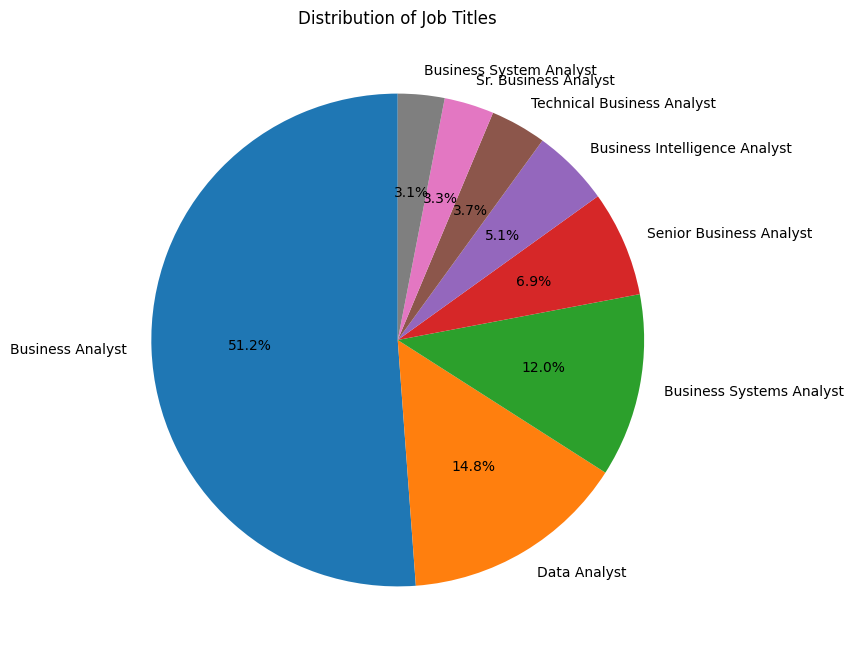

Most common positions:
Job Title
Business Analyst    502
Data Analyst        145
Name: count, dtype: int64


In [ ]:
title_counts = df_jobs['Job Title'].value_counts()

plt.figure(figsize=(8, 8))
title_counts.head(8).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Job Titles")
plt.ylabel('')
plt.show()

print("Most common positions:")
print(title_counts.head(2))


## 3.3.2

/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/1146533985.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_avg = df_jobs.groupby(salary_bins)['Rating'].mean().reset_index()


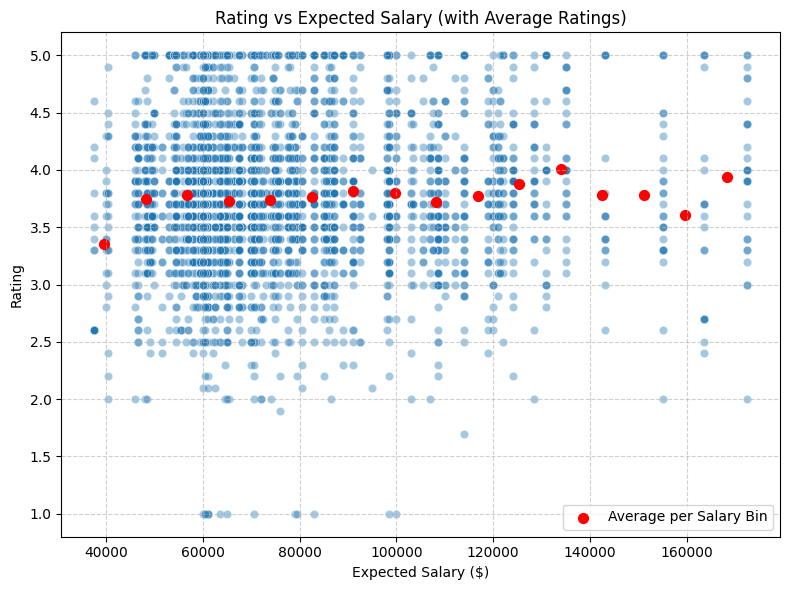

/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/1146533985.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_avg = df_jobs.groupby(size_bins)['Rating'].mean().reset_index()


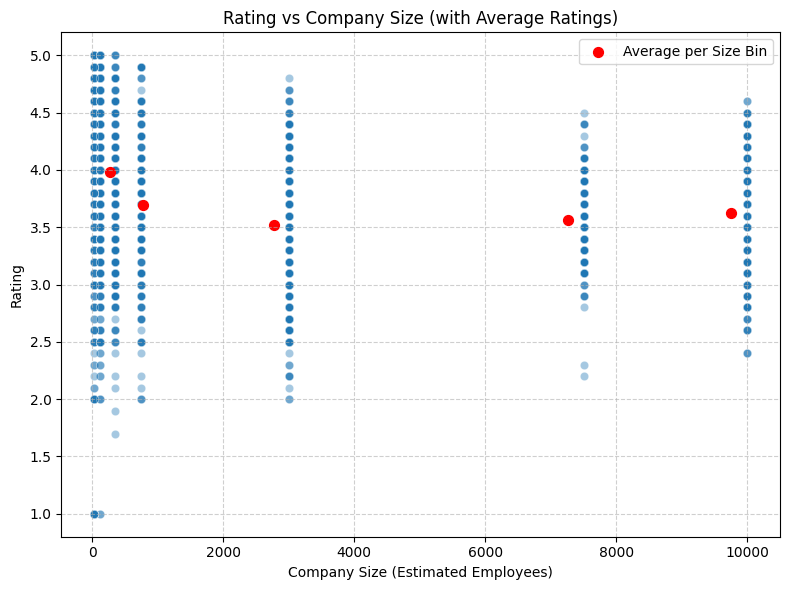

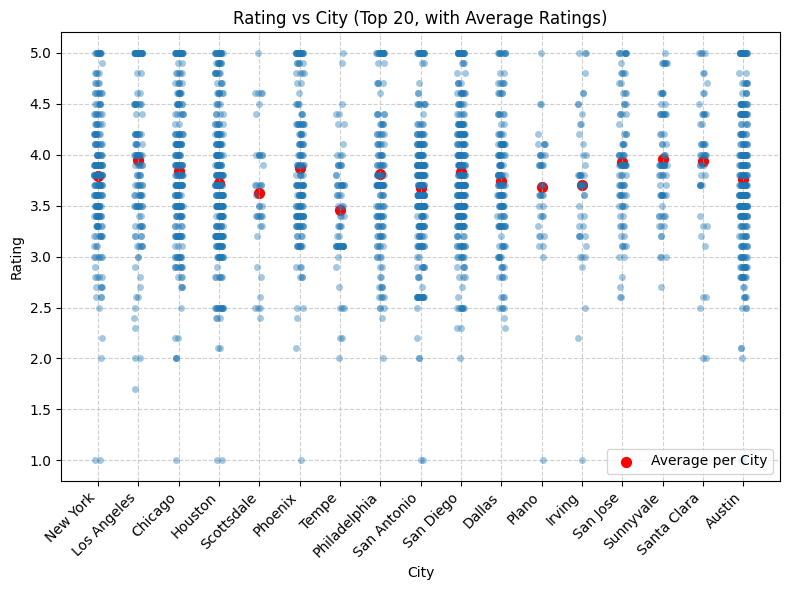

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_jobs, x='Expected Salary', y='Rating', alpha=0.4)

# Compute average rating per salary bin
salary_bins = pd.cut(df_jobs['Expected Salary'], bins=20)
salary_avg = df_jobs.groupby(salary_bins)['Rating'].mean().reset_index()
salary_avg['mid_salary'] = salary_avg['Expected Salary'].apply(lambda x: x.mid)

plt.scatter(salary_avg['mid_salary'], salary_avg['Rating'], color='red', s=50, label='Average per Salary Bin')

plt.title('Rating vs Expected Salary (with Average Ratings)')
plt.xlabel('Expected Salary ($)')
plt.ylabel('Rating')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_jobs, x='Company Size (est)', y='Rating', alpha=0.4)

# Compute average rating per company size bin
size_bins = pd.cut(df_jobs['Company Size (est)'], bins=20)
size_avg = df_jobs.groupby(size_bins)['Rating'].mean().reset_index()
size_avg['mid_size'] = size_avg['Company Size (est)'].apply(lambda x: x.mid)

plt.scatter(size_avg['mid_size'], size_avg['Rating'], color='red', s=50, label='Average per Size Bin')

plt.title('Rating vs Company Size (with Average Ratings)')
plt.xlabel('Company Size (Estimated Employees)')
plt.ylabel('Rating')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Keep only top 20 cities by frequency
top_20_cities = df_jobs['City'].value_counts().head(20).index
df_top_cities = df_jobs[df_jobs['City'].isin(top_20_cities)]

# Compute average rating per city
city_avg = df_top_cities.groupby('City')['Rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.stripplot(data=df_top_cities, x='City', y='Rating', alpha=0.4, jitter=True)
plt.scatter(city_avg['City'], city_avg['Rating'], color='red', s=50, label='Average per City')

plt.title('Rating vs City (Top 20, with Average Ratings)')
plt.xlabel('City')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 3.3.3

In [40]:
from scipy.stats import pearsonr

variables = ['Expected Salary', 'Company Size (est)']
for var in variables:
    df_valid = df_jobs[[var, 'Rating']].dropna()
    corr, p = pearsonr(df_valid[var], df_valid['Rating'])
    print(f"{var} vs Rating → correlation={corr:.3f}, p-value={p:.4f}")


Expected Salary vs Rating → correlation=0.047, p-value=0.0060
Company Size (est) vs Rating → correlation=-0.207, p-value=0.0000


## 3.3.4 Justify the claim: “Higher salary causes more satisfaction towards the job."

The correlation analysis between **Expected Salary** and **Job Rating** produced a Pearson correlation coefficient of **r = 0.047** with a **p-value = 0.006**. This result shows a very weak positive relationship between salary and job satisfaction. Although the p-value indicates statistical significance, the correlation strength is extremely small — salary explains less than **0.3 %** of the variation in job ratings.

Therefore, the claim that *“Higher salary causes more satisfaction towards the job”* is **not supported**. While there is a slight positive association, it is too weak to be meaningful. Other factors, such as company culture, work–life balance, or career opportunities, likely have a much greater impact on overall job satisfaction.


## 3.3.5

In [41]:
import re

with open('data/Q3/adjectives.txt', 'r') as f:
    adjectives = set(word.strip().lower() for word in f)

# Combine all job descriptions
text = ' '.join(df_jobs['Job Description'].dropna().astype(str)).lower()

# Extract words
words = re.findall(r'\b[a-z]{3,}\b', text)

# Filter adjectives
adjective_words = [w for w in words if w in adjectives]
print(f"Total adjectives found: {len(adjective_words)}")

Total adjectives found: 310100


## 3.3.6

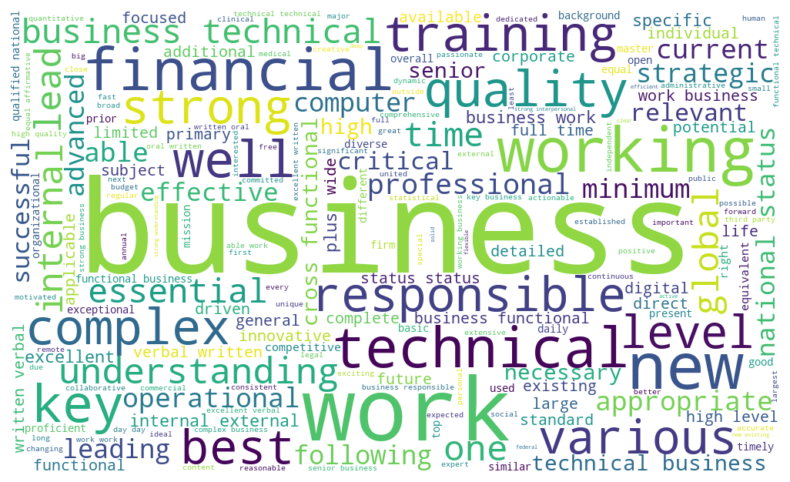

In [43]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(' '.join(adjective_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Based on the generated word cloud, the main capabilities required for a Business Analyst position in the U.S. revolve around a balance of **technical expertise, business understanding, and professional responsibility**. The most frequent words — such as *business*, *financial*, *technical*, *responsible*, and *quality* — indicate that analysts are expected to possess strong analytical and problem-solving skills, combined with solid knowledge of business and financial processes. Terms like *effective*, *complex*, and *innovative* emphasize the importance of critical thinking and adaptability when dealing with challenging projects. Furthermore, adjectives such as *professional*, *collaborative*, and *strong* highlight the value placed on communication and teamwork skills. Overall, the data suggests that successful analysts must be **technically proficient, business-minded, detail-oriented, and capable of working effectively in dynamic environments**.


**Explain your approach and assumptions once this section is completed.**

## **Approach and Assumptions**

In this phase, the dataset was analyzed using **Pandas**, **Matplotlib**, **Scipy**, and **WordCloud** to explore relationships among variables and extract key insights about business analyst positions in the U.S.

First, the **job title distribution** was visualized through a pie chart to identify the most common roles. The analysis showed that *“Business Analyst”* and *“Data Analyst”* were the two most dominant positions, together representing over 65% of all job listings. This helped establish the overall structure of the job market.

Next, three scatter plots were created to study how **Ratings** (as a measure of job satisfaction) relate to **Expected Salary**, **Company Size**, and **City**. For each attribute, red points were added to represent the **average rating** within each subset or bin (e.g., salary range, company size range, or top 20 cities). This allowed for clearer trend visualization without overplotting bias.

To statistically assess linear relationships, **Pearson correlation coefficients** were calculated using `scipy.stats.pearsonr`. The results showed that:

* The correlation between **Expected Salary and Rating** was *r = 0.047 (p = 0.006)* — a very weak positive relationship.
* The correlation between **Company Size and Rating** was *r = -0.207 (p = 0.000)* — indicating a mild negative relationship.

These findings suggest that salary has almost no direct effect on satisfaction, while larger companies may be slightly associated with lower ratings. Therefore, the claim *“Higher salary causes more satisfaction towards the job”* is **not supported**, as the effect size is negligible despite statistical significance.

Lastly, the **Job Description** column was tokenized into individual words, filtered using an **English adjective corpus**, and visualized via a **word cloud**. With over 310,000 adjectives extracted, the most frequent terms—such as *business*, *financial*, *technical*, *responsible*, and *effective*—highlighted the core competencies expected of analysts. These include strong analytical ability, technical proficiency, financial awareness, and effective communication.

Throughout this section, the main assumptions were:

1. Missing or invalid data (e.g., null ratings or misformatted salaries) were already cleaned in the previous stage.
2. Ratings were treated as continuous numerical values ranging from 1 to 5.
3. Company size and salary were approximated as linear measures for correlation testing, even though they may be discretized or estimated.
4. The adjective corpus accurately represented descriptive skill-related language within job descriptions.

Overall, this phase combined **quantitative correlation analysis** with **qualitative text mining** to provide a comprehensive understanding of the job market and the skills that define successful analyst roles.


# 4. Covid in the US
In this question, you are required to reproduce the graphs shown in a real journalistic article. After all, reproducibility is an important part of professional journalism as well as data science. Also, a great deal of a data scientist's work is to communicate data in a way that anyone with any level of expertise in the field would understand.

You should reproduce the 4 graphs shown in <a href="https://projects.fivethirtyeight.com/coronavirus-polls/"> this article</a>. The data is openly accessible through <a href="https://github.com/fivethirtyeight/covid-19-polls/"> FiveThirtyEight's github</a>. Nevertheless, both the data and the article are available in `data` folder in case of unstable internet connections!

*Note: Your graphs don't have to be as interactive or detailed as the ones on the website. Only showing the averages, some (not all) data points with light color, legends, titles, x values, and y values are necessary.*

In [59]:
base = Path("data/Q4/covid/covid-19-polls-master")

files = {
    "approval_polls"          : base / "covid_approval_polls.csv",
    "approval_polls_adjusted" : base / "covid_approval_polls_adjusted.csv",
    "approval_toplines"       : base / "covid_approval_toplines.csv",
    "concern_polls"           : base / "covid_concern_polls.csv",
    "concern_polls_adjusted"  : base / "covid_concern_polls_adjusted.csv",
    "concern_toplines"        : base / "covid_concern_toplines.csv",
}

for name, path in files.items():
    df = pd.read_csv(path)
    print(f"\n{name} → {path}")
    print(list(df.columns))
    display(df.head(2))



approval_polls → data/Q4/covid/covid-19-polls-master/covid_approval_polls.csv
['start_date', 'end_date', 'pollster', 'sponsor', 'sample_size', 'population', 'party', 'subject', 'tracking', 'text', 'approve', 'disapprove', 'url']


,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,approve,disapprove,url
0,2020-02-02,2020-02-04,YouGov,Economist,1500.0,a,all,Trump,FALSE,Do you approve or disapprove of Donald Trump’s...,42.0,29.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
1,2020-02-02,2020-02-04,YouGov,Economist,376.0,a,R,Trump,FALSE,Do you approve or disapprove of Donald Trump’s...,75.0,6.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...



approval_polls_adjusted → data/Q4/covid/covid-19-polls-master/covid_approval_polls_adjusted.csv
['subject', 'modeldate', 'party', 'startdate', 'enddate', 'pollster', 'grade', 'samplesize', 'population', 'weight', 'influence', 'multiversions', 'tracking', 'approve', 'disapprove', 'approve_adjusted', 'disapprove_adjusted', 'timestamp', 'url']


,subject,modeldate,party,startdate,enddate,pollster,grade,samplesize,population,weight,influence,multiversions,tracking,approve,disapprove,approve_adjusted,disapprove_adjusted,timestamp,url
0,Biden,9/22/2022,D,1/24/2021,1/26/2021,YouGov,B+,477.0,a,0.628524,0.0,NaN,NaN,84.0,3.0,86.535946,2.429147,08:55:08 22 Apr 2021,https://docs.cdn.yougov.com/ld46rgtdlz/econTab...
1,Biden,9/22/2022,D,1/29/2021,2/1/2021,Morning Consult,B,808.0,rv,0.833747,0.0,NaN,NaN,89.0,7.0,90.312766,6.414667,08:55:08 22 Apr 2021,https://assets.morningconsult.com/wp-uploads/2...



approval_toplines → data/Q4/covid/covid-19-polls-master/covid_approval_toplines.csv
['subject', 'modeldate', 'party', 'approve_estimate', 'disapprove_estimate', 'timestamp']


,subject,modeldate,party,approve_estimate,disapprove_estimate,timestamp
0,Biden,9/22/2022,D,82.481350,13.458074,09:11:07 22 Sep 2022
1,Biden,9/22/2022,I,44.242568,45.651047,09:11:09 22 Sep 2022



concern_polls → data/Q4/covid/covid-19-polls-master/covid_concern_polls.csv
['start_date', 'end_date', 'pollster', 'sponsor', 'sample_size', 'population', 'party', 'subject', 'tracking', 'text', 'very', 'somewhat', 'not_very', 'not_at_all', 'url']


,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,very,somewhat,not_very,not_at_all,url
0,2020-01-27,2020-01-29,Morning Consult,NaN,2202,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,19.0,33.0,23.0,11.0,https://morningconsult.com/wp-content/uploads/...
1,2020-01-31,2020-02-02,Morning Consult,NaN,2202,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,26.0,32.0,25.0,7.0,https://morningconsult.com/wp-content/uploads/...



concern_polls_adjusted → data/Q4/covid/covid-19-polls-master/covid_concern_polls_adjusted.csv
['subject', 'modeldate', 'party', 'startdate', 'enddate', 'pollster', 'grade', 'samplesize', 'population', 'weight', 'influence', 'multiversions', 'tracking', 'very', 'somewhat', 'not_very', 'not_at_all', 'very_adjusted', 'somewhat_adjusted', 'not_very_adjusted', 'not_at_all_adjusted', 'timestamp', 'url']


,subject,modeldate,party,startdate,enddate,pollster,grade,samplesize,population,weight,...,very,somewhat,not_very,not_at_all,very_adjusted,somewhat_adjusted,not_very_adjusted,not_at_all_adjusted,timestamp,url
0,concern-economy,9/22/2022,all,1/27/2020,1/29/2020,Morning Consult,B,2202.0,a,0.830621,...,19.0,33.0,23.0,11.0,15.675954,36.575784,26.595179,11.630194,08:55:27 22 Apr 2021,https://morningconsult.com/wp-content/uploads/...
1,concern-economy,9/22/2022,all,1/31/2020,2/2/2020,Morning Consult,B,2202.0,a,0.756429,...,26.0,32.0,25.0,7.0,22.675954,35.575784,28.595179,7.630194,08:55:27 22 Apr 2021,https://morningconsult.com/wp-content/uploads/...



concern_toplines → data/Q4/covid/covid-19-polls-master/covid_concern_toplines.csv
['subject', 'modeldate', 'party', 'very_estimate', 'somewhat_estimate', 'not_very_estimate', 'not_at_all_estimate', 'timestamp']


,subject,modeldate,party,very_estimate,somewhat_estimate,not_very_estimate,not_at_all_estimate,timestamp
0,concern-economy,3/2/2022,all,48.953147,35.466522,10.451832,3.739761,15:12:25 2 Mar 2022
1,concern-infected,3/2/2022,all,24.186896,32.532791,26.515491,16.539938,15:12:28 2 Mar 2022


In [61]:
plt.rcParams["figure.dpi"] = 140
BASE = "data/Q4/covid/covid-19-polls-master"

def parse_mid_date(s, e):
    s = pd.to_datetime(s)
    e = pd.to_datetime(e)
    return s + (e - s) / 2

def wavg(group, value_col, weight_col):
    v = group[value_col].astype(float)
    w = group[weight_col].fillna(0).astype(float)
    if w.sum() == 0:
        return np.nan
    return np.average(v, weights=w)

def daily_weighted(df, value_col, weight_col="samplesize", date_col="mid_date"):
    out = (
        df.groupby(date_col)
          .apply(lambda g: wavg(g, value_col, weight_col))
          .rename(value_col)
          .to_frame()
          .reset_index()
          .sort_values(date_col)
    )
    return out

def smooth(df, y, window=21):
    s = df.set_index("mid_date")[y].rolling(window, min_periods=3, center=True).mean()
    return s.reset_index().rename(columns={y: f"{y}_sm"})


/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/2860353135.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: wavg(g, value_col, weight_col))
/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/2860353135.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: wavg(g, value_col, weight_col))


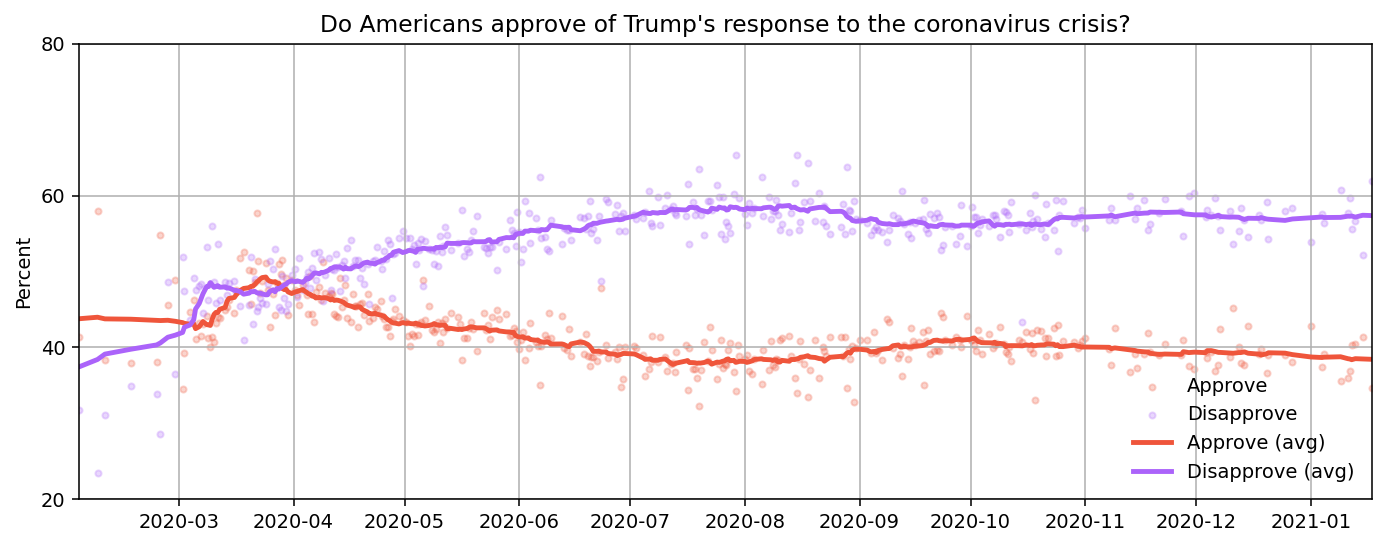

/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/2860353135.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: wavg(g, value_col, weight_col))
/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/2860353135.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: wavg(g, value_col, weight_col))


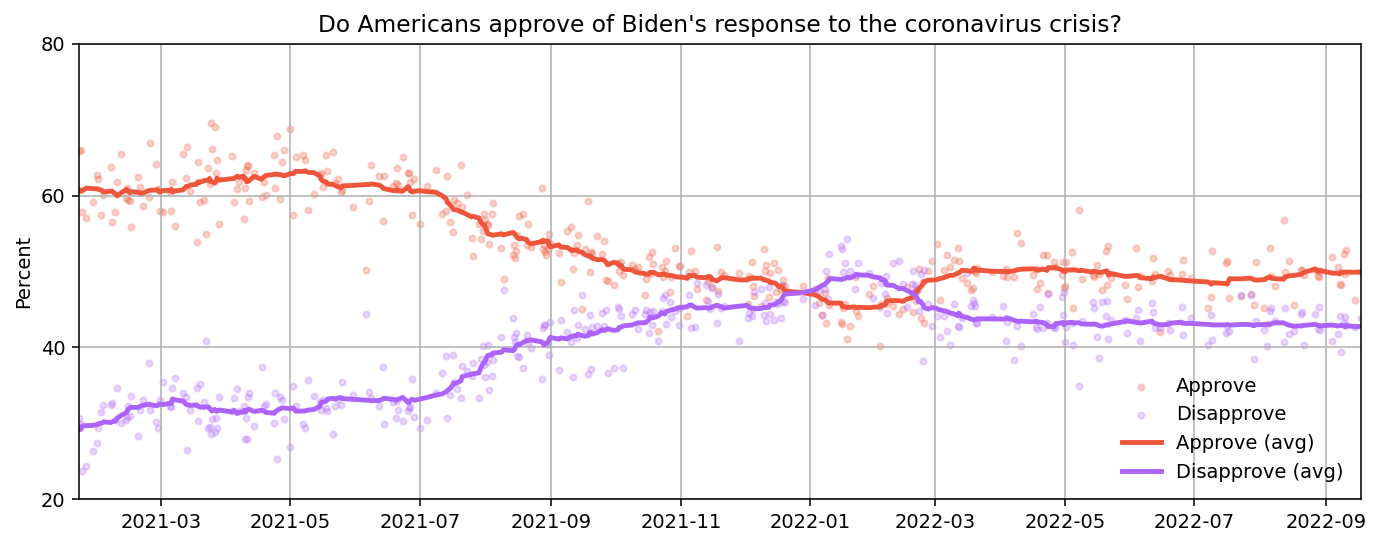

In [ ]:
ap = pd.read_csv(f"{BASE}/covid_approval_polls_adjusted.csv")

ap["mid_date"]  = parse_mid_date(ap["startdate"], ap["enddate"])
ap["samplesize"] = ap["samplesize"].fillna(0)

def plot_overall(subject="Biden"):
    dsub = ap.loc[ap["subject"].eq(subject)].copy()
    # daily weighted by sample size 
    d_approve = daily_weighted(dsub, "approve_adjusted")
    d_disapp  = daily_weighted(dsub, "disapprove_adjusted")
    # smooth
    s_app  = smooth(d_approve, "approve_adjusted")
    s_dis  = smooth(d_disapp,  "disapprove_adjusted")

    merged = (d_approve.merge(d_disapp, on="mid_date", suffixes=("_app","_dis"))
                       .merge(s_app, on="mid_date")
                       .merge(s_dis, on="mid_date"))

    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(d_approve["mid_date"], d_approve["approve_adjusted"], s=10, alpha=0.25, color="#ef553b", label="Approve")
    ax.scatter(d_disapp["mid_date"],  d_disapp["disapprove_adjusted"], s=10, alpha=0.25, color="#ab63fa", label="Disapprove")

    ax.plot(s_app["mid_date"], s_app["approve_adjusted_sm"], color="#ef553b", lw=2.5, label="Approve (avg)")
    ax.plot(s_dis["mid_date"], s_dis["disapprove_adjusted_sm"], color="#ab63fa", lw=2.5, label="Disapprove (avg)")

    # Biden sworn in
    # ax.axvline(pd.Timestamp("2021-01-20"), color="0.2", lw=1, ls="--")
    # ax.text(pd.Timestamp("2021-01-20"), ax.get_ylim()[1]*0.96, "Biden sworn\ninto office", ha="right", va="top", fontsize=9)

    ax.set_title(f"Do Americans approve of {subject}'s response to the coronavirus crisis?")
    ax.set_xlim(s_app["mid_date"].min(), s_app["mid_date"].max())
    ax.set_yticks(np.arange(20, 100, 20))
    ax.set_ylabel("Percent")
    ax.set_xlabel("")
    # ax.set_ylim(20, 65 if subject=="Biden" else 70)
    ax.legend(loc="lower right", frameon=False)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

plot_overall("Trump")
plot_overall("Biden")


/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/2860353135.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: wavg(g, value_col, weight_col))
/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/2860353135.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: wavg(g, value_col, weight_col))
/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/28

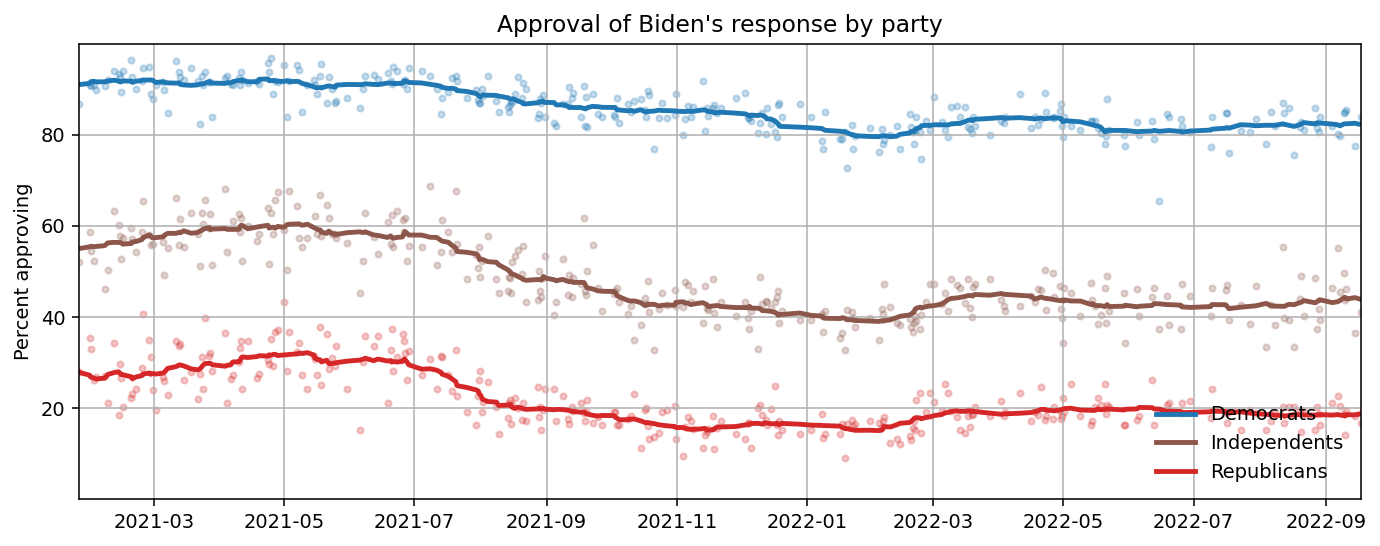

/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/2860353135.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: wavg(g, value_col, weight_col))
/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/2860353135.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: wavg(g, value_col, weight_col))
/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/28

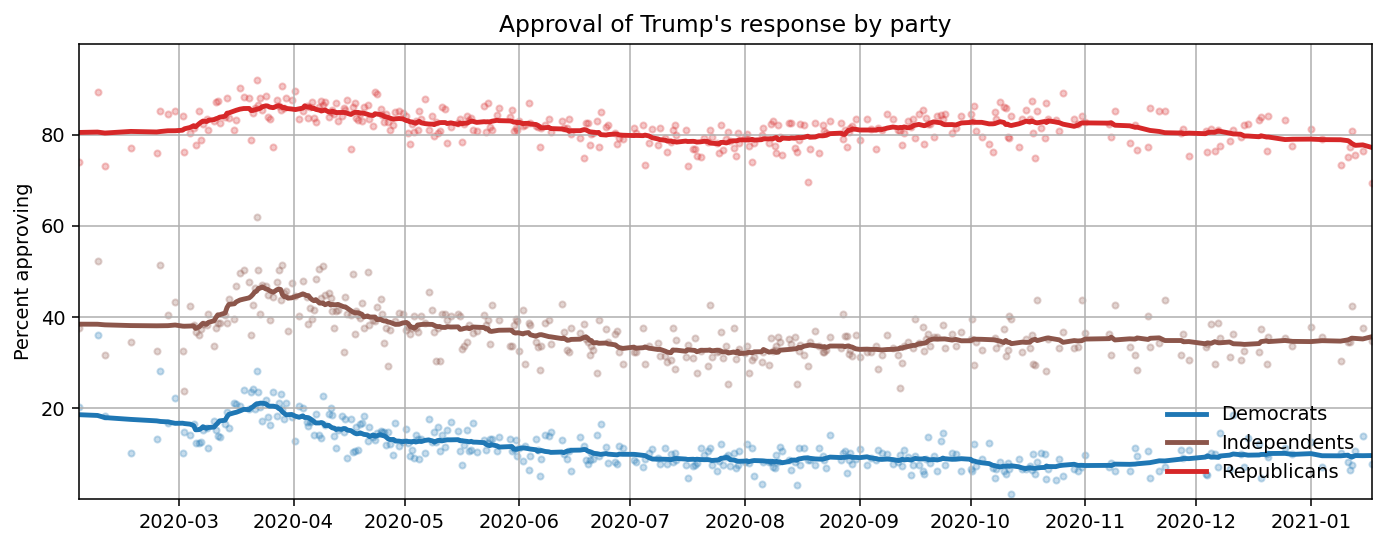

In [ ]:
def plot_by_party(subject="Biden"):
    dsub = ap.loc[ap["subject"].eq(subject) & ap["party"].isin(["D","R","I"])].copy()
    dsub["mid_date"] = parse_mid_date(dsub["startdate"], dsub["enddate"])

    colors = {"D":"#1f77b4", "I":"#8c564b", "R":"#d62728"}
    labels = {"D":"Democrats", "I":"Independents", "R":"Republicans"}

    fig, ax = plt.subplots(figsize=(10,4))
    for p in ["D","I","R"]:
        dp = dsub[dsub["party"].eq(p)]
        day = daily_weighted(dp, "approve_adjusted")
        sm  = smooth(day, "approve_adjusted")

        ax.scatter(day["mid_date"], day["approve_adjusted"], s=10, alpha=0.25, color=colors[p])
        ax.plot(sm["mid_date"], sm["approve_adjusted_sm"], lw=2.5, color=colors[p], label=labels[p])

    # ax.axvline(pd.Timestamp("2021-01-20"), color="0.2", lw=1, ls="--")
    # ax.text(pd.Timestamp("2021-01-20"), ax.get_ylim()[1]*0.98, "Biden sworn\ninto office", ha="right", va="top", fontsize=9)

    ax.set_title(f"Approval of {subject}'s response by party")
    ax.set_ylabel("Percent approving")
    ax.set_xlim(dsub["mid_date"].min(), dsub["mid_date"].max())
    ax.set_xlabel("")
    ax.set_ylim(0, 100)
    ax.set_yticks(np.arange(20, 100, 20))
    ax.legend(loc="lower right", frameon=False)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

plot_by_party("Biden")
plot_by_party("Trump")


/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/2860353135.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: wavg(g, value_col, weight_col))
/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/2860353135.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: wavg(g, value_col, weight_col))
/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/28

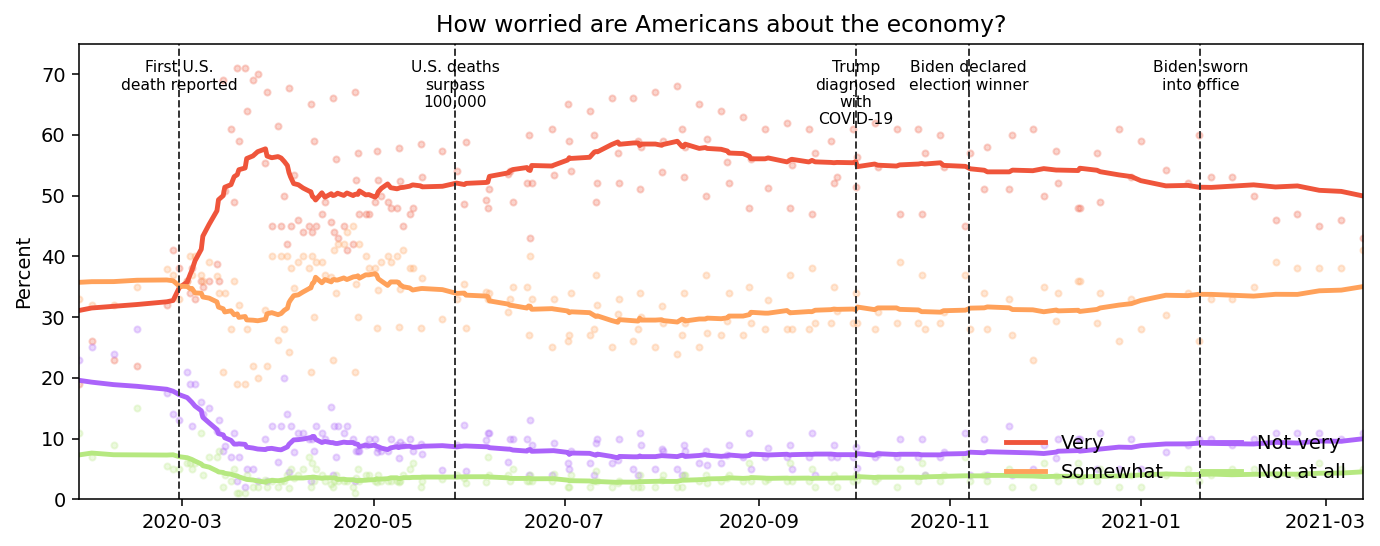

In [ ]:
conc = pd.read_csv(f"{BASE}/covid_concern_polls.csv")
conc["mid_date"] = parse_mid_date(conc["start_date"], conc["end_date"])
conc = conc[conc["subject"].eq("concern-economy")].copy()
conc["sample_size"] = conc["sample_size"].fillna(0)

series = {
    "very":        ("Very",        "#ef553b"),
    "somewhat":    ("Somewhat",    "#FFA15A"),
    "not_very":    ("Not very",    "#AB63FA"),
    "not_at_all":  ("Not at all",  "#B6E880"),
}

fig, ax = plt.subplots(figsize=(10,4))
for col, (lab, colr) in series.items():
    day = daily_weighted(conc.rename(columns={"sample_size":"samplesize"}), col)
    sm  = smooth(day, col)
    ax.scatter(day["mid_date"], day[col], s=10, alpha=0.25, color=colr)
    ax.plot(sm["mid_date"], sm[f"{col}_sm"], lw=2.5, color=colr, label=lab)

# Major timeline markers used in the article
for date, lab in [
    ("2020-02-29","First U.S.\ndeath reported"),
    ("2020-05-27","U.S. deaths\nsurpass\n100,000"),
    ("2020-10-02","Trump\ndiagnosed\nwith\nCOVID-19"),
    ("2020-11-07","Biden declared\nelection winner"),
    ("2021-01-20","Biden sworn\ninto office")
]:
    ax.axvline(pd.Timestamp(date), color="0.2", lw=1, ls="--")
    ax.text(pd.Timestamp(date), ax.get_ylim()[1]*0.97, lab, ha="center", va="top", fontsize=8)

ax.set_title("How worried are Americans about the economy?")
ax.set_ylabel("Percent")
ax.set_xlim(conc["mid_date"].min(), conc["mid_date"].max())
ax.set_xlabel("")
ax.set_ylim(0, 75) 
ax.legend(loc="lower right", frameon=False, ncol=2)
plt.tight_layout()
plt.show()


/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/2860353135.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: wavg(g, value_col, weight_col))
/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/2860353135.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: wavg(g, value_col, weight_col))
/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_2796/28

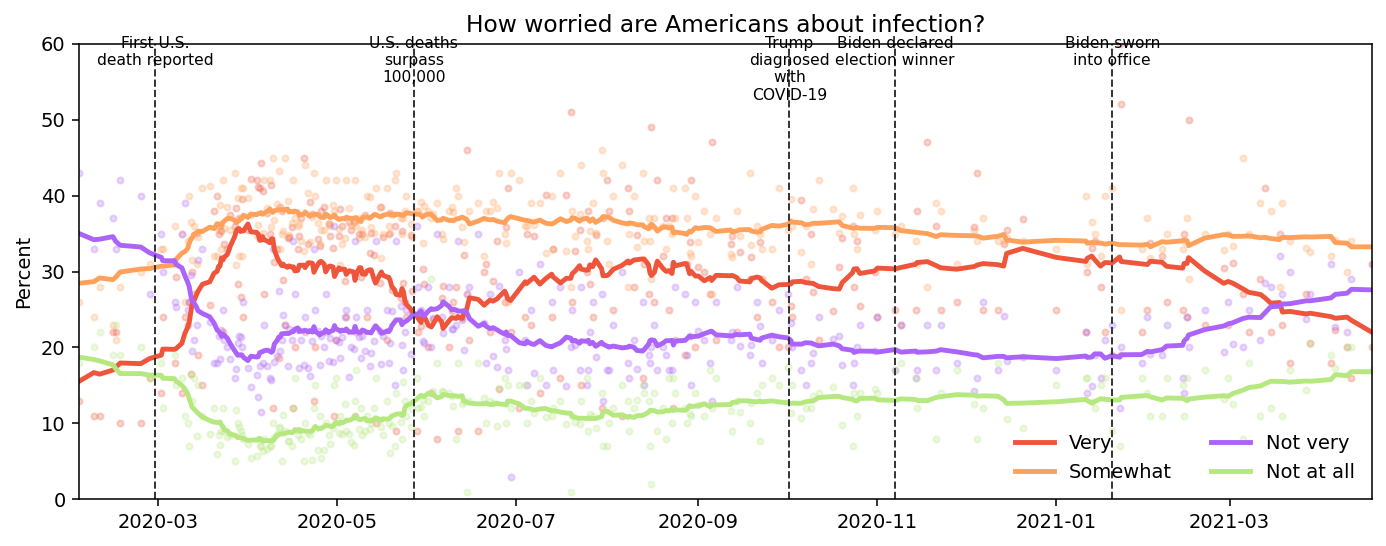

In [90]:
conc_inf = pd.read_csv(f"{BASE}/covid_concern_polls.csv")
conc_inf["mid_date"] = parse_mid_date(conc_inf["start_date"], conc_inf["end_date"])
conc_inf = conc_inf[conc_inf["subject"].eq("concern-infected")].copy()
conc_inf["sample_size"] = conc_inf["sample_size"].fillna(0)

fig, ax = plt.subplots(figsize=(10,4))
for col, (lab, colr) in series.items():
    day = daily_weighted(conc_inf.rename(columns={"sample_size":"samplesize"}), col)
    sm  = smooth(day, col)
    ax.scatter(day["mid_date"], day[col], s=10, alpha=0.25, color=colr)
    ax.plot(sm["mid_date"], sm[f"{col}_sm"], lw=2.5, color=colr, label=lab)

for date, lab in [
    ("2020-02-29","First U.S.\ndeath reported"),
    ("2020-05-27","U.S. deaths\nsurpass\n100,000"),
    ("2020-10-02","Trump\ndiagnosed\nwith\nCOVID-19"),
    ("2020-11-07","Biden declared\nelection winner"),
    ("2021-01-20","Biden sworn\ninto office")
]:
    ax.axvline(pd.Timestamp(date), color="0.2", lw=1, ls="--")
    ax.text(pd.Timestamp(date), ax.get_ylim()[1]*0.97, lab, ha="center", va="top", fontsize=8)

ax.set_title("How worried are Americans about infection?")
ax.set_ylabel("Percent")
ax.set_xlabel("")
ax.set_xlim(conc_inf["mid_date"].min(), conc_inf["mid_date"].max())
ax.set_ylim(0, 60)
ax.legend(loc="lower right", frameon=False, ncol=2)
plt.tight_layout()
plt.show()


**Explain your approach and assumptions once this section is completed.**

### **Approach and Assumptions**

In this part of the analysis, I examined how public opinion toward the U.S. government’s handling of the coronavirus crisis evolved over time, using polling data from the *FiveThirtyEight COVID-19 Polls* dataset. The data included both approval ratings for Presidents Trump and Biden, and measures of public concern about the economy and infection risk.

To begin, I loaded the relevant CSV files and converted each poll’s start and end dates into a single midpoint date, representing when the survey was conducted. I then calculated daily averages of approval or concern levels, **weighted by sample size** so that larger polls contributed more to the overall trend. After aggregating the daily data, I applied a **21-day centered rolling average** to smooth short-term fluctuations and highlight long-term patterns in public opinion.

The visualizations include both the individual daily points (shown as faint scatter plots) and the smoothed trend lines (solid lines). Major national events such as the **first U.S. COVID-19 death**, **Trump’s diagnosis**, and **Biden’s inauguration** were marked with dashed vertical lines to provide historical context. Approval data were separated by **president** and **political party** (Democrats, Independents, and Republicans), while concern levels were broken down by response type (“very,” “somewhat,” “not very,” and “not at all”).

In terms of assumptions, I used the **adjusted poll data** because it accounts for methodological differences and weighting corrections. The midpoint date was assumed to best represent the timing of each poll. The 21-day rolling window was selected as a simple approximation of the local regression smoothing (LOESS) used by FiveThirtyEight. Missing or invalid values were removed before analysis to avoid bias.

Overall, this approach balances clarity and interpretability—showing both the raw variability in public opinion and the underlying long-term trends in how Americans viewed the pandemic response and related concerns.


## 5. Book store data web scraping

Use BeautifulSoup to scrape the data from [this site](https://books.toscrape.com/). It contains bookstore data. 

1. Scrape books’ titles, prices, ratings, and categories from the first page of each category on the site.

2. Store the data in a Pandas DataFrame and perform cleaning (e.g., converting ratings from words to numbers).

3. Visualize key insights:

    Distribution of book prices by category (boxplots).

    Average rating per category (bar chart).

    Number of books scraped per category (bar chart).

4. Write the scraped dataset to a CSV file for further study.

In [13]:
import re
import time
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
import matplotlib.pyplot as plt

In [14]:

BASE = "https://books.toscrape.com/"
RATING_MAP = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}

session = requests.Session()
session.headers.update({"User-Agent": "Mozilla/5.0 (compatible; scraping-demo)"})

def get_soup(url: str) -> BeautifulSoup:
    r = session.get(url, timeout=30)
    r.raise_for_status()
    return BeautifulSoup(r.text, "html.parser")

def get_categories():
    """
    Return list of (category_name, absolute_url) from the sidebar.
    """
    soup = get_soup(BASE)
    cat_links = soup.select("div.side_categories ul.nav-list ul li a")
    categories = []
    for a in cat_links:
        name = a.get_text(strip=True)
        href = a.get("href")
        url = urljoin(BASE, href)
        categories.append((name, url))
    return categories

def parse_price(text: str) -> float:
    """
    Extract numeric price safely from text like '£51.77' (handles encoding issues).
    """
    m = re.search(r"[\d.]+", text)
    return float(m.group()) if m else None

def scrape_category_first_page(category_name: str, category_url: str):
    """
    Scrape only the first page of a category (index.html) and return list of book dicts.
    """
    soup = get_soup(category_url)
    items = []

    for card in soup.select("ol.row li article.product_pod"):
        # Title
        a = card.select_one("h3 a")
        title = (a.get("title") or a.get_text(strip=True)).strip()

        # rel_link = a.get("href")
        # product_url = urljoin(category_url, rel_link)
        # img_rel = card.select_one("div.image_container img")["src"]
        # img_url = urljoin(category_url, img_rel)

        # Price
        price_text = card.select_one("p.price_color").get_text(strip=True)
        price = parse_price(price_text)

        # Rating from class list
        rating_classes = card.select_one("p.star-rating")["class"]
        rating_word = next((c for c in rating_classes if c in RATING_MAP), None)
        rating = RATING_MAP.get(rating_word)

        # availability
        # avail = card.select_one("p.instock.availability").get_text(" ", strip=True)

        items.append({
            "Title": title,
            "Price": price,
            "Rating": rating,
            "Category": category_name,
            # "URL": product_url,
            # "Image": img_url,
            # "Availability": avail,
        })

    return items

# ---- Run the scrape (first page of each category) ----
all_rows = []
for cat_name, cat_url in get_categories():
    rows = scrape_category_first_page(cat_name, cat_url)
    all_rows.extend(rows)
    print(f"{cat_name:25s} -> {len(rows)} books")
    time.sleep(0.5)

print(f"\nTotal books scraped (first page of each category): {len(all_rows)}")
for r in all_rows[:5]:
    print(r)


Travel                    -> 11 books
Mystery                   -> 20 books
Historical Fiction        -> 20 books
Sequential Art            -> 20 books
Classics                  -> 19 books
Philosophy                -> 11 books
Romance                   -> 20 books
Womens Fiction            -> 17 books
Fiction                   -> 20 books
Childrens                 -> 20 books
Religion                  -> 7 books
Nonfiction                -> 20 books
Music                     -> 13 books
Default                   -> 20 books
Science Fiction           -> 16 books
Sports and Games          -> 5 books
Add a comment             -> 20 books
Fantasy                   -> 20 books
New Adult                 -> 6 books
Young Adult               -> 20 books
Science                   -> 14 books
Poetry                    -> 19 books
Paranormal                -> 1 books
Art                       -> 8 books
Psychology                -> 7 books
Autobiography             -> 9 books
Parenting          

In [15]:
# ---- Create DataFrame ----
df = pd.DataFrame(all_rows)

# Ensure correct types
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Drop any rows missing key data
df.dropna(subset=["Price", "Rating", "Category"], inplace=True)

print("DataFrame summary:")
print(f"\nTotal records after cleaning: {len(df)}")

df.head()


DataFrame summary:

Total records after cleaning: 517


,Title,Price,Rating,Category
0,It's Only the Himalayas,45.17,2,Travel
1,Full Moon over Noahâs Ark: An Odyssey to Mou...,49.43,4,Travel
2,See America: A Celebration of Our National Par...,48.87,3,Travel
3,Vagabonding: An Uncommon Guide to the Art of L...,36.94,2,Travel
4,Under the Tuscan Sun,37.33,3,Travel


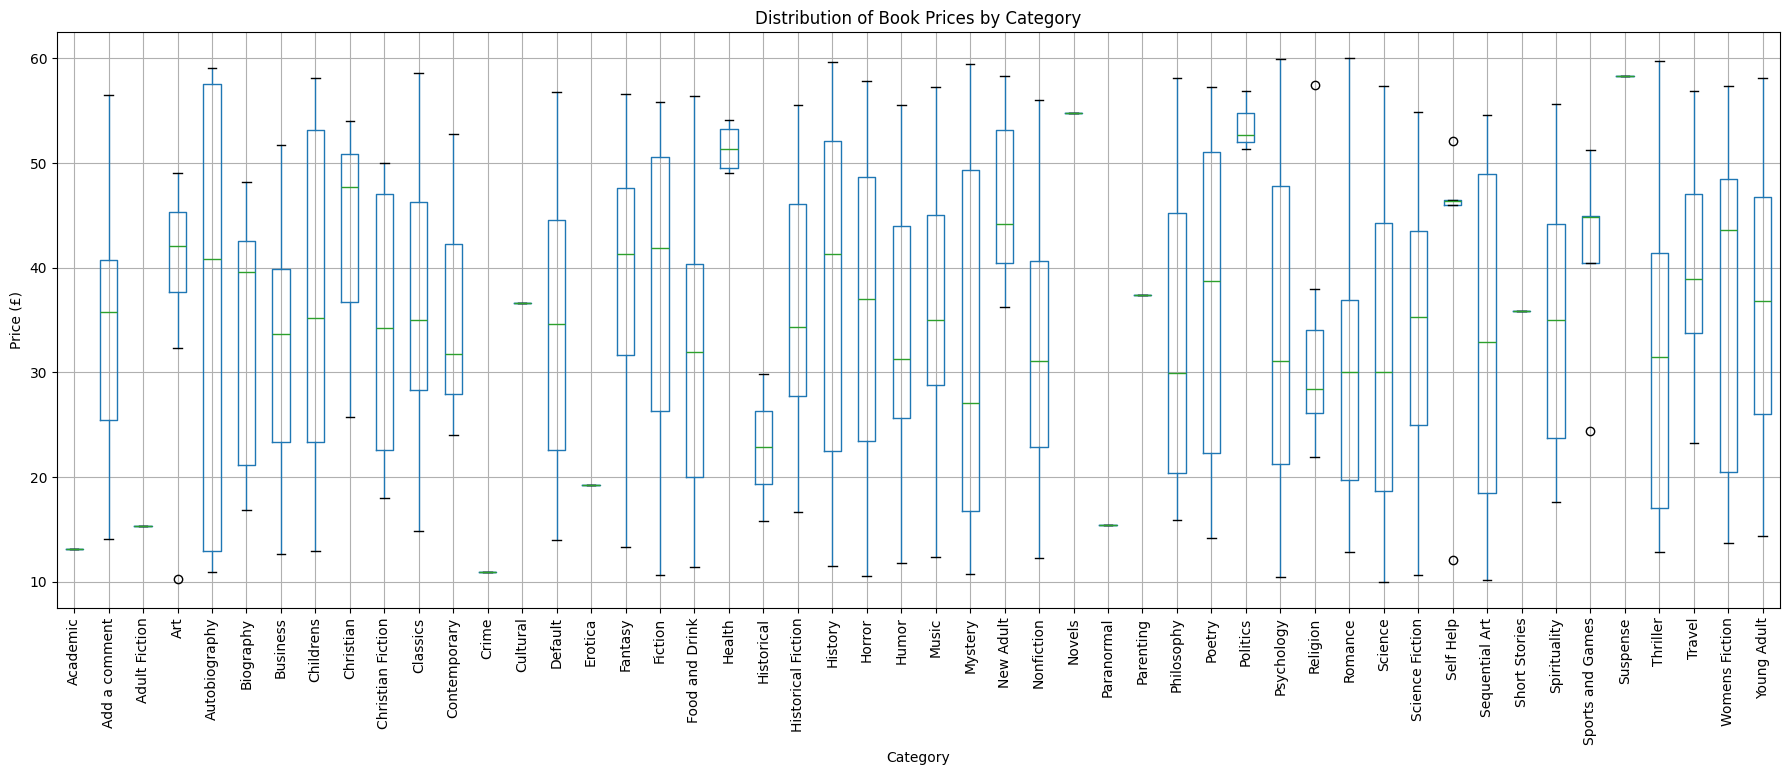

In [16]:
# --- Boxplot: Price distribution by category ---
fig, ax = plt.subplots(figsize=(18, 8))
df.boxplot(column="Price", by="Category", grid=True, rot=90, ax=ax)
ax.set_title("Distribution of Book Prices by Category")
ax.set_ylabel("Price (£)")
plt.suptitle("")  # remove the default "Boxplot grouped by Category"
plt.tight_layout()
plt.show()

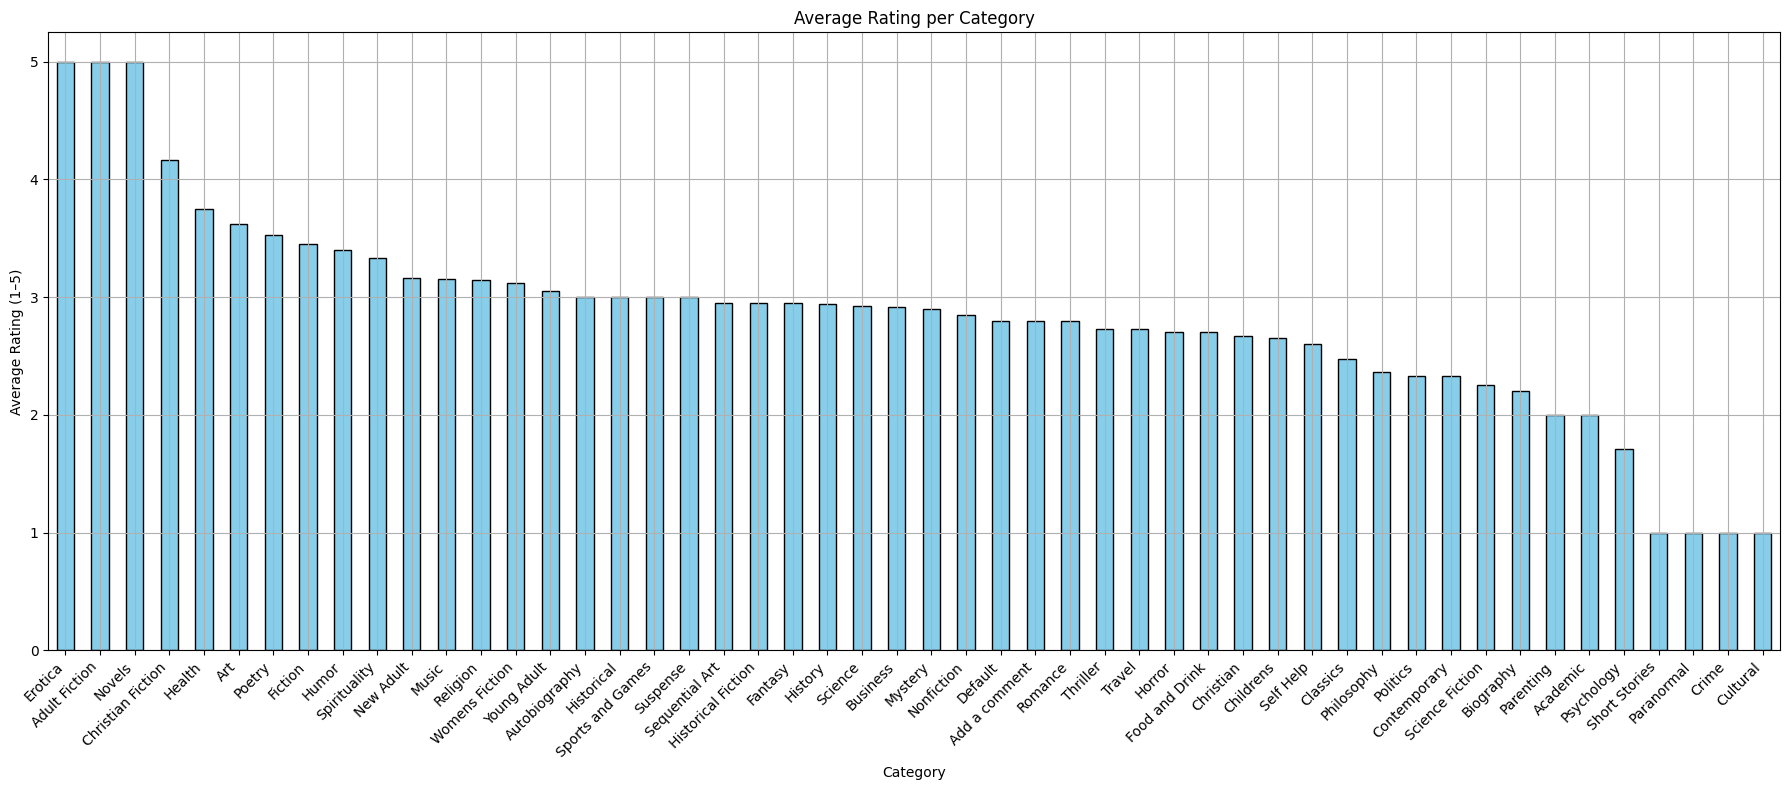

In [17]:
# --- Bar chart: Average rating per category ---
avg_rating = df.groupby("Category")["Rating"].mean().sort_values(ascending=False)
plt.figure(figsize=(18,8))
avg_rating.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Rating per Category")
plt.ylabel("Average Rating (1–5)")
plt.xlabel("Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid("on")
plt.show()

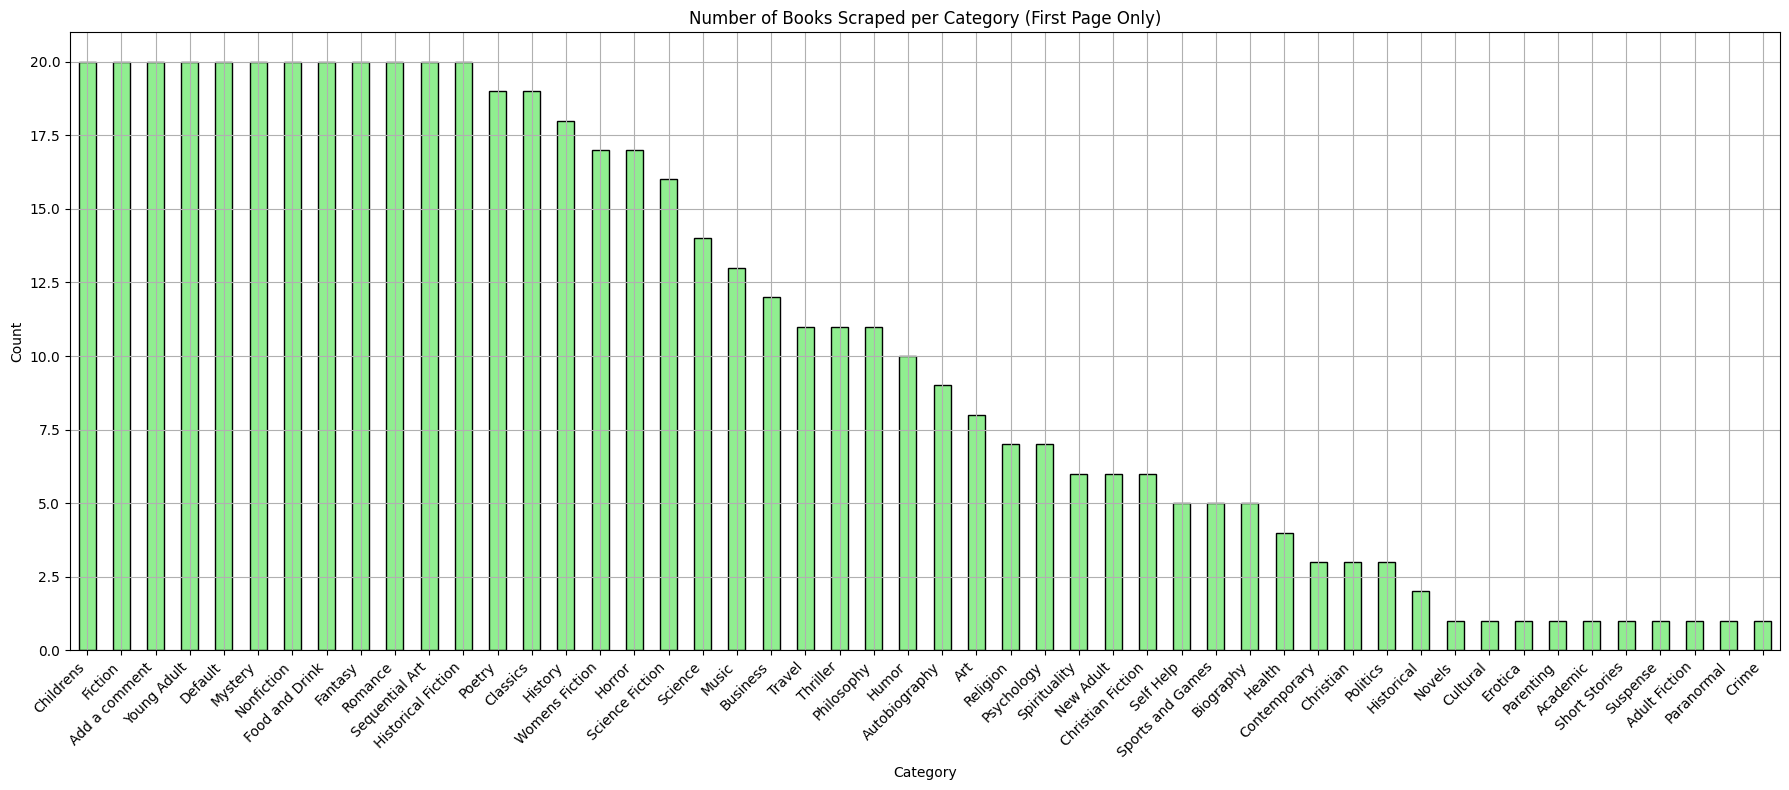

In [18]:
# --- Bar chart: Number of books scraped per category ---
book_counts = df["Category"].value_counts()
plt.figure(figsize=(18,8))
book_counts.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Number of Books Scraped per Category (First Page Only)")
plt.ylabel("Count")
plt.xlabel("Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid('on')
plt.show()

In [19]:
df.to_csv("./scraped_dataset.csv", index=False)


### **Approach and Assumptions**

In this part, I used **BeautifulSoup** to scrape data from the website *Books to Scrape*. The scraper first collected the list of all book categories from the sidebar menu and then visited the **first page of each category** to extract individual books’ details. For each book, I retrieved the **title**, **price**, **rating**, and **category**. The rating values (e.g., *One*, *Two*, *Three*, etc.) were converted into numeric scores (1–5) for easier analysis.
After collecting the data, I stored it in a **Pandas DataFrame** and cleaned the dataset by converting prices to numeric values and removing incomplete records. The analysis focused on three key visual insights:

1. **Distribution of book prices by category** using boxplots to identify price variation within each category.
2. **Average rating per category** with a bar chart to highlight categories with the highest-rated books.
3. **Number of books scraped per category** to visualize category size and representation.
   Finally, the cleaned dataset was exported to a **CSV file** for further exploration.
   I assumed that each category’s first page provides a representative sample of the category and that price and rating data are accurate as displayed on the site.



### **Insights and Discussion**

The visualizations reveal several interesting patterns about the bookstore’s inventory.
The **boxplot of book prices by category** shows that most book prices are concentrated between £20 and £50, with a few outliers extending beyond £60. Categories such as *Fantasy*, *Science Fiction*, and *Poetry* exhibit wider price ranges, suggesting a mix of both premium and affordable titles. In contrast, categories like *Health* and *Self Help* appear to have more consistent, mid-range pricing.

The **average rating bar chart** indicates that most categories maintain moderately high ratings, with *Erotica*, *Adult Fiction*, and *Novels* achieving the highest average ratings close to 5. On the lower end, categories such as *Crime*, *Cultural*, and *Paranormal* received lower ratings, indicating more variability in reader satisfaction or fewer high-rated books.

Finally, the **number of books per category chart** shows that some categories like *Children’s*, *Fiction*, and *Young Adult* are more heavily represented, while categories such as *Crime*, *Paranormal*, and *Academic* contain far fewer titles. This imbalance suggests that the store’s collection is more focused on general fiction and youth-oriented genres, with niche categories having limited availability.

Overall, the data highlights how book pricing, popularity, and category distribution vary across the bookstore, offering insights into market diversity and customer interest.



## 6. Class War in Titanic (Bonus)

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

**Run the following cell for a brief description about the dataset**

In [1]:
from IPython.core.display import HTML
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_FOLDER = './data/Q6'

In [3]:
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


In [4]:
df = pd.read_excel(DATA_FOLDER + "/titanic.xls")

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`.  
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

## 6.1

In [5]:
print("=== Dataset Info ===")
df.info()


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
print("=== ORIGINAL SUMMARY (before any transformations) ===\n")
print(df.dtypes, "\n")

=== ORIGINAL SUMMARY (before any transformations) ===

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object 



In [7]:
# helper: compute a compact summary row for each column
def column_summary(frame):
    rows = []
    for col in frame.columns:
        s = frame[col]
        dtype = s.dtype

        if pd.api.types.is_numeric_dtype(dtype):
            value_range = f"{s.min()} – {s.max()}"
            details = f"min={s.min()}, max={s.max()}, NAs={s.isna().sum()}"
            kind = "Numeric"
        else:
            n_unique = s.nunique(dropna=True)
            examples = s.dropna().unique()[:3]
            value_range = f"{n_unique} distinct values"
            details = f"examples={list(examples)}, NAs={s.isna().sum()}"
            kind = "Text / mixed"

        rows.append([col, dtype, kind, value_range, details])
    return pd.DataFrame(
        rows,
        columns=["Column", "dtype", "Initial kind", "Value range", "Extra info"],
    )

orig_summary = column_summary(df)
print(orig_summary.to_string(index=False))

   Column   dtype Initial kind          Value range                                                                                                          Extra info
   pclass   int64      Numeric                1 – 3                                                                                                 min=1, max=3, NAs=0
 survived   int64      Numeric                0 – 1                                                                                                 min=0, max=1, NAs=0
     name  object Text / mixed 1307 distinct values examples=['Allen, Miss. Elisabeth Walton', 'Allison, Master. Hudson Trevor', 'Allison, Miss. Helen Loraine'], NAs=0
      sex  object Text / mixed    2 distinct values                                                                                  examples=['female', 'male'], NAs=0
      age float64      Numeric        0.1667 – 80.0                                                                                       min=0.1667, max=80.0, 

In [8]:
# --- Decide which columns are categorical (by meaning, not by dtype) ---
categorical_cols = ["pclass", "survived", "sex", "embarked", "boat", "cabin"]

print("\nColumns chosen as categorical (by interpretation):")
print(categorical_cols)


Columns chosen as categorical (by interpretation):
['pclass', 'survived', 'sex', 'embarked', 'boat', 'cabin']


In [9]:
# --- Transform them to pandas 'category' dtype ---
df[categorical_cols] = df[categorical_cols].astype("category")

In [10]:
# create an age group categorical for later analyses
age_bins = range(0, 90, 10)
age_labels = [f"{i}-{i+10}" for i in age_bins[:-1]]
df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=False)

In [11]:
print("\n=== SUMMARY AFTER CONVERTING TO CATEGORICAL ===\n")
print(df.dtypes, "\n")


=== SUMMARY AFTER CONVERTING TO CATEGORICAL ===

pclass       category
survived     category
name           object
sex          category
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin        category
embarked     category
boat         category
body          float64
home.dest      object
age_group    category
dtype: object 



In [12]:
cat_summary = df[categorical_cols + ["age_group"]].describe().T
print(cat_summary)


          count unique          top freq
pclass     1309      3            3  709
survived   1309      2            0  809
sex        1309      2         male  843
embarked   1307      3            S  914
boat        486     28           13   39
cabin       295    186  C23 C25 C27    6
age_group  1045      8        20-30  344


In this part of the analysis, I began by loading the *Titanic* dataset (`titanic.xls`) and inspecting its structure using `info()` and `dtypes` to identify the number of observations, column types, and completeness of the data. The dataset contains 1,309 records and 14 attributes, a mix of numerical and textual variables. I generated a summary table to describe each attribute’s type, value range, and missing values. Numerical columns such as `pclass`, `survived`, `age`, `sibsp`, `parch`, `fare`, and `body` were continuous or discrete variables with clear numeric ranges (e.g., *Age: 0.17–80.0 years*, *Fare: £0–512.33*). The remaining attributes—`name`, `sex`, `ticket`, `cabin`, `embarked`, `boat`, and `home.dest`—were initially stored as text and represented categorical or descriptive data.

After examining their meaning, I identified six attributes as **categorical** despite some being stored as integers: `pclass`, `survived`, `sex`, `embarked`, `boat`, and `cabin`. These were explicitly converted to pandas’ `category` type to ensure proper handling in later analyses. Additionally, a derived categorical variable, `age_group`, was created by dividing `age` into ten-year bins (e.g., *0–10*, *10–20*, …, *70–80*). This transformation preserves the original data structure while making categorical comparisons more efficient. Post-conversion summaries confirmed the correct data types, with categorical variables showing clear category counts and dominant values. Overall, this preprocessing step provided a structured understanding of the dataset, clarified variable roles, and prepared the data for meaningful visualization and statistical analysis.


## 6.2

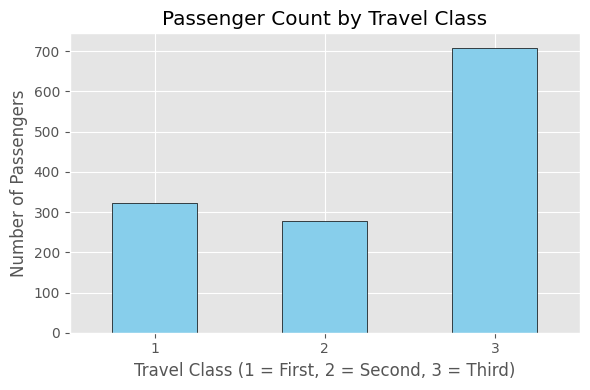

In [13]:
# Set a consistent style
plt.style.use("ggplot")

# --- Histogram 1: Travel Class ---
plt.figure(figsize=(6,4))
df["pclass"].value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Passenger Count by Travel Class")
plt.xlabel("Travel Class (1 = First, 2 = Second, 3 = Third)")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

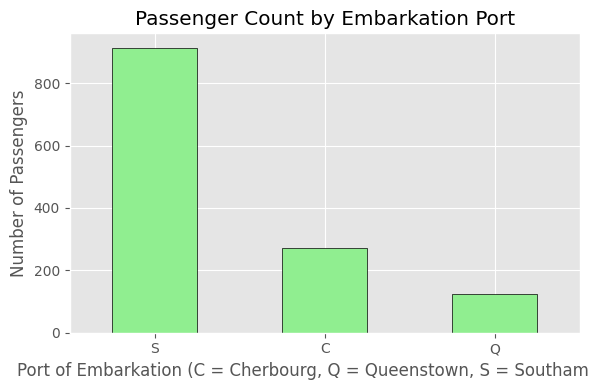

In [14]:
# --- Histogram 2: Embarkation Port ---
plt.figure(figsize=(6,4))
df["embarked"].value_counts().plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Passenger Count by Embarkation Port")
plt.xlabel("Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

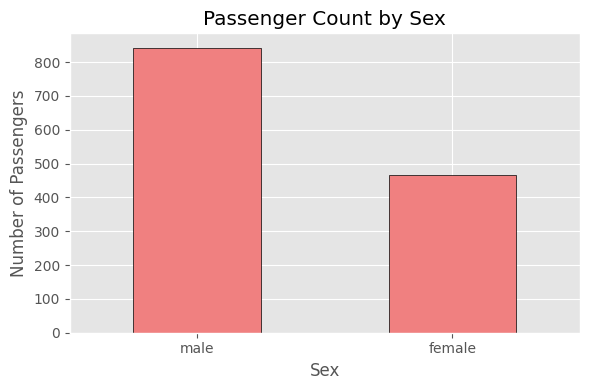

In [15]:
# --- Histogram 3: Sex Distribution ---
plt.figure(figsize=(6,4))
df["sex"].value_counts().plot(kind="bar", color="lightcoral", edgecolor="black")
plt.title("Passenger Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


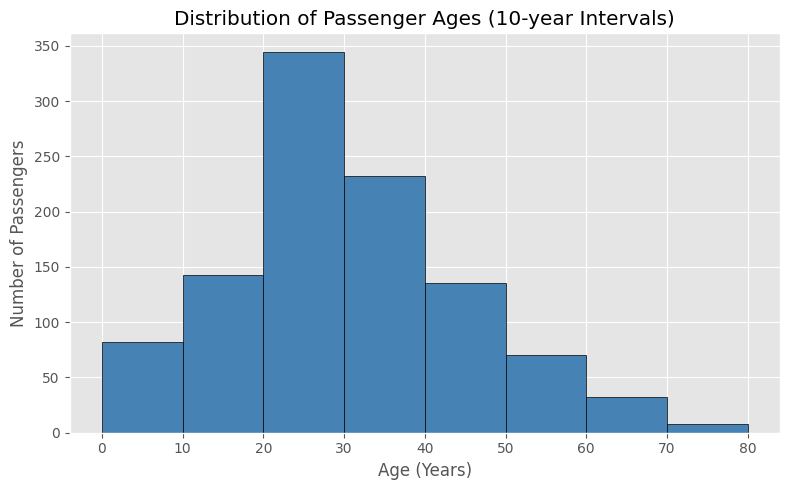

In [16]:
# --- Histogram 4: Age Distribution (Decade Intervals) ---
plt.figure(figsize=(8,5))
df["age"].plot(kind="hist", bins=range(0, 90, 10), color="steelblue", edgecolor="black")
plt.title("Distribution of Passenger Ages (10-year Intervals)")
plt.xlabel("Age (Years)")
plt.ylabel("Number of Passengers")
plt.tight_layout()
plt.show()

In this section, histograms were created to visually explore the distributions of four key Titanic dataset attributes: **travel class (`pclass`)**, **embarkation port (`embarked`)**, **sex (`sex`)**, and **age (`age`)**. For the categorical variables, bar plots were used to display the frequency of passengers within each category, while for the continuous variable *age*, a histogram with **10-year intervals** was applied to discretize the data and highlight age group patterns.

The **travel class** distribution shows a clear imbalance, with the majority of passengers traveling in **third class**, followed by **first** and **second class**. This suggests that most travelers belonged to lower socio-economic groups. The **embarkation port** histogram reveals that most passengers boarded at **Southampton (S)**, while smaller proportions departed from **Cherbourg (C)** and **Queenstown (Q)**, consistent with the Titanic’s primary route. The **sex** distribution indicates a strong male majority, with approximately two-thirds of passengers being men, reflecting a significant gender imbalance on board. Finally, the **age** histogram illustrates that most passengers were **young adults between 20 and 40 years old**, with fewer children and elderly passengers. The distribution is right-skewed, showing a gradual decrease in frequency among older age groups.

Overall, these histograms provide an initial understanding of the Titanic’s demographic composition, highlighting the predominance of third-class, male, and young adult passengers, and establishing a solid foundation for subsequent survival and socio-demographic analyses.


## 6.3

In [17]:
# Extract the first cabin letter (deck), ignore missing values
df["cabin_floor"] = df["cabin"].str.extract(r"([A-Za-z])", expand=False)

# Calculate proportions (excluding missing cabin values)
cabin_floor_counts = df["cabin_floor"].value_counts(dropna=True)
cabin_floor_proportion = cabin_floor_counts / cabin_floor_counts.sum()

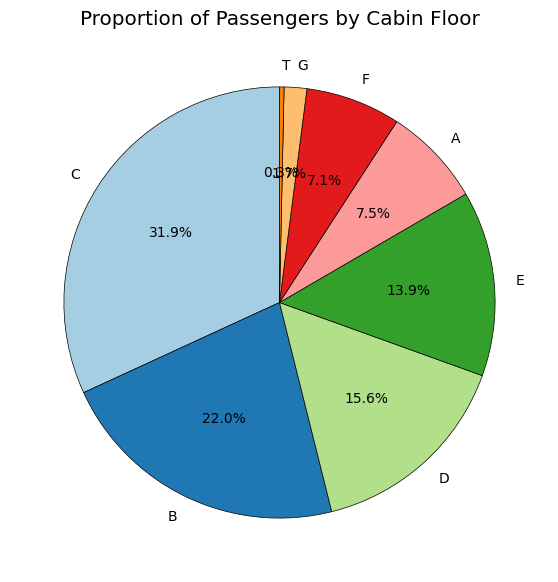

In [18]:
# --- Pie Chart Visualization ---
plt.figure(figsize=(7,7))
plt.pie(
    cabin_floor_proportion,
    labels=cabin_floor_proportion.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Proportion of Passengers by Cabin Floor")
plt.show()

In [19]:
print('Number of Passengers in Each Cabin FLoor')
print(cabin_floor_counts)


Number of Passengers in Each Cabin FLoor
cabin_floor
C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: count, dtype: int64


To analyze how passengers were distributed across different decks of the Titanic, the first letter from each cabin identifier was extracted to represent the **cabin floor** (e.g., “B52 B54 B56” → “B”). Missing values were excluded since many passengers—especially from third class—did not have assigned cabins. The resulting data was grouped and visualized in a **pie chart** to show the proportional representation of each deck.

The chart indicates that the majority of identifiable cabins were located on decks **C (31.9%)**, **B (22.0%)**, **D (15.6%)**, and **E (13.9%)**, while upper decks **A (7.5%)** and **F (7.1%)** housed fewer passengers. Decks **G** and **T** had minimal representation (under 2%). This pattern reflects the **class-based spatial organization** aboard the Titanic, where wealthier passengers occupied higher decks with more cabins, while lower-class travelers were primarily located on lower or shared decks, many of which are missing from cabin records.

## 6.4

/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_5677/2683105020.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pclass")["survived"]


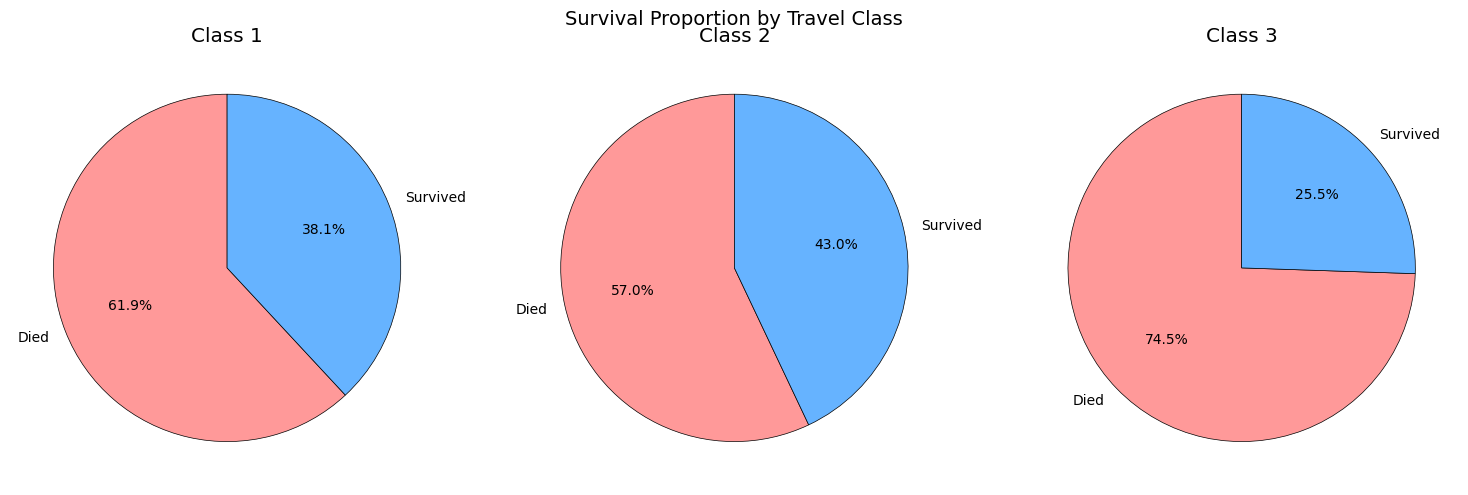

  pclass survived  proportion
0      1        1    0.619195
1      1        0    0.380805
2      2        0    0.570397
3      2        1    0.429603
4      3        0    0.744711
5      3        1    0.255289


In [20]:
# Calculate survival proportions per class
survival_by_class = (
    df.groupby("pclass")["survived"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
classes = sorted(df["pclass"].dropna().unique())
colors = ["#ff9999", "#66b3ff"]  # red = died, blue = survived

for i, cls in enumerate(classes):
    data = survival_by_class[survival_by_class["pclass"] == cls]
    axes[i].pie(
        data["proportion"],
        labels=["Died", "Survived"],
        autopct="%1.1f%%",
        startangle=90,
        colors=colors,
        wedgeprops={"edgecolor": "black"},
    )
    axes[i].set_title(f"Class {cls}")

fig.suptitle("Survival Proportion by Travel Class", fontsize=14)
plt.tight_layout()
plt.show()

# Print summary table
print(survival_by_class)


To explore how survival rates varied across different travel classes, the dataset was grouped by **travel class (`pclass`)** and **survival status (`survived`)**. The proportion of survivors and non-survivors within each class was calculated and visualized using **pie charts displayed as subplots**. This approach provides a clear side-by-side comparison of survival outcomes among first, second, and third-class passengers.

The visualization shows a strong relationship between **social class and likelihood of survival**. Passengers in **First Class** had the highest survival rate at approximately **61.9%**, followed by **Second Class** at **43.0%**, while only **25.5%** of **Third-Class** passengers survived. This pattern reveals that **higher socioeconomic status significantly increased the probability of survival**, likely due to better cabin locations, proximity to lifeboats, and evacuation prioritization. Conversely, the low survival rate among third-class passengers reflects the structural and social inequalities aboard the Titanic.



## 6.5

  pclass     sex  proportion
0      1  female    0.965278
1      1    male    0.340782
2      2  female    0.886792
3      2    male    0.146199
4      3  female    0.490741
5      3    male    0.152130


/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_5677/1484616706.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["pclass", "sex"])["survived"]


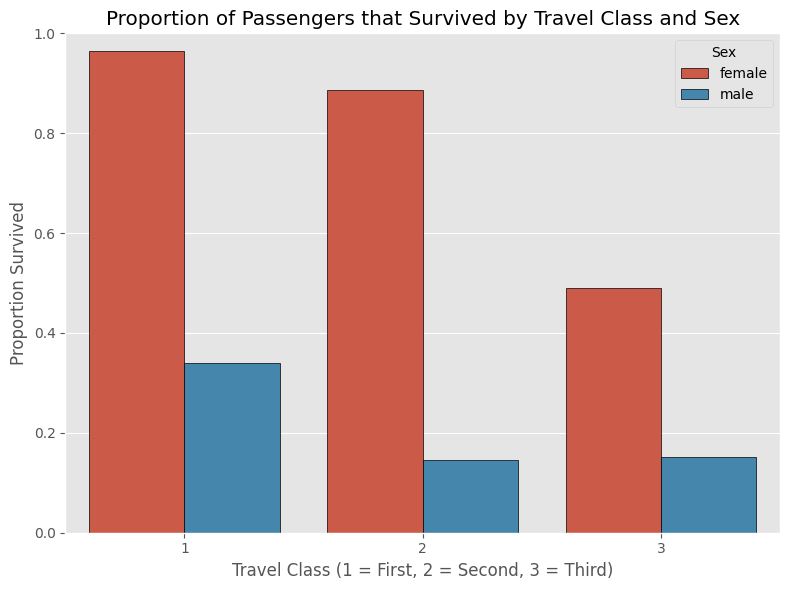

In [21]:
# Calculate survival proportions by class and sex
survival_by_class_sex = (
    df.groupby(["pclass", "sex"])["survived"]
      .apply(lambda s: (s == 1).sum() / len(s))  
      .reset_index(name="proportion")
)

print(survival_by_class_sex)

# Plot as a grouped bar chart (single histogram-style figure)
plt.figure(figsize=(8, 6))
sns.barplot(
    data=survival_by_class_sex,
    x="pclass",
    y="proportion",
    hue="sex",
    edgecolor="black"
)

plt.title("Proportion of Passengers that Survived by Travel Class and Sex")
plt.xlabel("Travel Class (1 = First, 2 = Second, 3 = Third)")
plt.ylabel("Proportion Survived")
plt.ylim(0, 1)
plt.legend(title="Sex")
plt.tight_layout()
plt.show()


To further investigate the relationship between survival rates, travel class, and gender, the data were grouped by **travel class (`pclass`)** and **sex (`sex`)**, and the survival proportions were calculated for each subgroup. The resulting values were visualized using a **grouped histogram**, where each bar represents the proportion of passengers who survived within a given class and gender category.

The results reveal a clear pattern that highlights the combined influence of **social status** and **gender** on survival outcomes. **Females had a substantially higher survival rate** than males in all three travel classes. Among women, survival was highest in **First Class (96.5%)**, followed by **Second Class (88.7%)**, and lowest in **Third Class (49.1%)**. In contrast, **male survival rates** were significantly lower, with only **34.1%** surviving in First Class, **14.6%** in Second Class, and **15.2%** in Third Class.

This analysis underscores the strong effect of both **socioeconomic privilege** and **gender-based evacuation priorities** during the Titanic disaster. Higher-class female passengers had the greatest chance of survival, while lower-class males faced the lowest probability of rescue, reflecting deep social disparities in access to safety and resources.

## 6.6

In [22]:
# Start from rows with non-missing age
df_age = df.dropna(subset=["age"]).copy()

# Create 2 equally populated age categories (Younger / Older halves)
df_age["age_category"] = pd.qcut(
    df_age["age"],
    q=2,
    labels=["Younger Half", "Older Half"]
)



In [23]:
# Explicit min/max age for each age category
age_range_table = (
    df_age.groupby("age_category")["age"]
          .agg(["min", "max", "count"])
          .sort_index()
)

print("=== Explicit Age Ranges by Category ===")
print(age_range_table)


=== Explicit Age Ranges by Category ===
                  min   max  count
age_category                      
Younger Half   0.1667  28.0    536
Older Half    28.5000  80.0    510


/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_5677/1139256978.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age.groupby("age_category")["age"]


In [24]:
# Calculate survival proportions by age_category, pclass and sex
survival_by_age_class_sex = (
    df_age.assign(survived_num=df_age["survived"].astype(int))
          .groupby(["age_category", "pclass", "sex"])["survived_num"]
          .mean()
          .reset_index(name="survival_proportion")
)

# Put the result in a DataFrame
survival_by_age_class_sex.set_index(["age_category", "pclass", "sex"], inplace=True)

print("=== Survival Proportions by Age Category, Class and Sex ===")
print(survival_by_age_class_sex)


=== Survival Proportions by Age Category, Class and Sex ===
                            survival_proportion
age_category pclass sex                        
Younger Half 1      female             0.951220
                    male               0.531250
             2      female             0.910714
                    male               0.216216
             3      female             0.513761
                    male               0.183036
Older Half   1      female             0.967391
                    male               0.302521
             2      female             0.872340
                    male               0.083333
             3      female             0.372093
                    male               0.144000


/var/folders/tg/b1z1k0cx1z1cr_jv24vhxgrm0000gn/T/ipykernel_5677/1613613558.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["age_category", "pclass", "sex"])["survived_num"]


To further explore the relationship between age, gender, and social class, passengers were divided into two equally populated **age categories** based on their age distribution. The **Younger Half** included passengers aged approximately **0.17 to 28 years**, while the **Older Half** included those aged **28.5 to 80 years**. Survival proportions were then calculated for each combination of **age category**, **travel class**, and **sex**, with results presented in a multi-indexed DataFrame. The analysis reveals a strong pattern consistent with historical accounts: **female passengers** in all classes had a significantly higher likelihood of survival compared to their male counterparts, with the advantage being most pronounced among **younger women in first and second class** (over 90% survival). Conversely, **older males in lower classes** had the lowest survival probabilities, some below 15%. These findings indicate that **age, gender, and class jointly influenced survival**, reflecting the social norms and evacuation priorities aboard the Titanic—particularly the “women and children first” policy that favored younger and higher-class passengers.